### Importing Libraries and Dataset

In [393]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler


import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy.stats import boxcox, yeojohnson

import pmdarima as pm
from pmdarima import auto_arima


In [394]:
# Load the CSV file into a DataFrame
df1 = pd.read_csv('AdidasUSSalesDatasets.csv')

# Display the first few rows of the DataFrame
print(df1.head())


      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732       1/1/20  Northeast  New York  New York   
1  Foot Locker      1185732       1/2/20  Northeast  New York  New York   
2  Foot Locker      1185732       1/3/20  Northeast  New York  New York   
3  Foot Locker      1185732       1/4/20  Northeast  New York  New York   
4  Foot Locker      1185732       1/5/20  Northeast  New York  New York   

                     Product Price per Unit Units Sold Total Sales  \
0      Men's Street Footwear        $50.00       1,200   $600,000    
1    Men's Athletic Footwear        $50.00       1,000   $500,000    
2    Women's Street Footwear        $40.00       1,000   $400,000    
3  Women's Athletic Footwear        $45.00         850   $382,500    
4              Men's Apparel        $60.00         900   $540,000    

  Operating Profit Operating Margin Sales Method  
0        $300,000               50%     In-store  
1        $150,000         

In [395]:
AdidasSales = df1

### Checking for missing or NA values

In [396]:

# Check for missing values
missing_values = AdidasSales.isna().sum()
print("Missing values:\n", missing_values)


Missing values:
 Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


### Check the datatypes of the columns 

In [397]:
# Check the data types of each column
print(AdidasSales.dtypes)

Retailer            object
Retailer ID          int64
Invoice Date        object
Region              object
State               object
City                object
Product             object
Price per Unit      object
Units Sold          object
Total Sales         object
Operating Profit    object
Operating Margin    object
Sales Method        object
dtype: object


### Convert the datatypes for appropriate analysis

In [398]:
# Remove dollar signs and commas, and convert to numeric
AdidasSales['Price per Unit'] = AdidasSales['Price per Unit'].str.replace('$', '').astype(float)
AdidasSales['Units Sold'] = AdidasSales['Units Sold'].str.replace(',', '').astype(int)
AdidasSales['Total Sales'] = AdidasSales['Total Sales'].str.replace('$', '').str.replace(',', '').astype(float)
AdidasSales['Operating Profit'] = AdidasSales['Operating Profit'].str.replace('$', '').str.replace(',', '').astype(float)

# Convert 'Operating Margin' to numeric after removing the percentage sign
AdidasSales['Operating Margin'] = AdidasSales['Operating Margin'].str.replace('%', '').astype(float) 

# Display the first few rows of the DataFrame to verify the changes
print(AdidasSales.head())


      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732       1/1/20  Northeast  New York  New York   
1  Foot Locker      1185732       1/2/20  Northeast  New York  New York   
2  Foot Locker      1185732       1/3/20  Northeast  New York  New York   
3  Foot Locker      1185732       1/4/20  Northeast  New York  New York   
4  Foot Locker      1185732       1/5/20  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              50.0     In-store  
1   

In [399]:
# Check the data types of each column
print(AdidasSales.dtypes)

Retailer             object
Retailer ID           int64
Invoice Date         object
Region               object
State                object
City                 object
Product              object
Price per Unit      float64
Units Sold            int64
Total Sales         float64
Operating Profit    float64
Operating Margin    float64
Sales Method         object
dtype: object


### Remove unwanted columns  

In [400]:
# Remove the 'Retailer ID' column
AdidasSales = AdidasSales.drop(columns=['Retailer ID'])

# Display the first few rows of the DataFrame to verify the changes
print(AdidasSales.head())

      Retailer Invoice Date     Region     State      City  \
0  Foot Locker       1/1/20  Northeast  New York  New York   
1  Foot Locker       1/2/20  Northeast  New York  New York   
2  Foot Locker       1/3/20  Northeast  New York  New York   
3  Foot Locker       1/4/20  Northeast  New York  New York   
4  Foot Locker       1/5/20  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              50.0     In-store  
1          150000.0              30.0     In-store  
2          140000.0          

### Create Gender Column 

In [401]:
# Extract gender information from the 'Product' column
AdidasSales['Gender'] = AdidasSales['Product'].apply(lambda x: 'Men' if 'Men' in x else 'Women')

# Display the first few rows of the DataFrame to verify the changes
print(AdidasSales.head())

      Retailer Invoice Date     Region     State      City  \
0  Foot Locker       1/1/20  Northeast  New York  New York   
1  Foot Locker       1/2/20  Northeast  New York  New York   
2  Foot Locker       1/3/20  Northeast  New York  New York   
3  Foot Locker       1/4/20  Northeast  New York  New York   
4  Foot Locker       1/5/20  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method Gender  
0          300000.0              50.0     In-store    Men  
1          150000.0              30.0     In-store    Men  
2       

### Checking for duplicate entries 

In [402]:
# Check for duplicate entries
duplicate_entries = AdidasSales[AdidasSales.duplicated()]

# Display count of duplicate entries
print("Number of duplicate entries:", len(duplicate_entries))


Number of duplicate entries: 0


### Checking for outliers

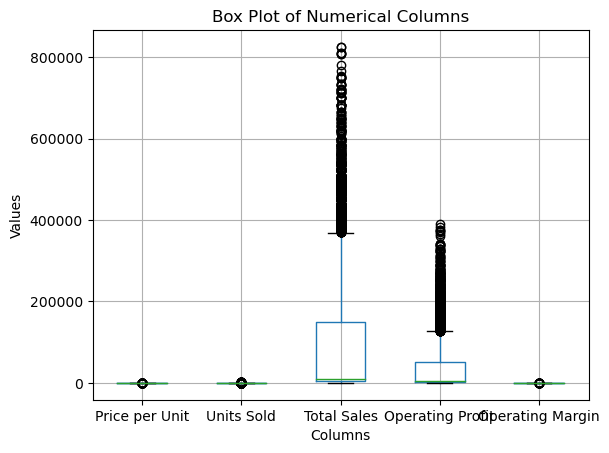

In [403]:
import matplotlib.pyplot as plt

# Select numerical columns for box plots
numerical_columns = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']

# Create box plots for numerical columns
AdidasSales[numerical_columns].boxplot()

# Set plot title and labels
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

Here in a box plot, points that fall outside the whiskers (the lines extending from the box) are often considered outliers. However, it's important to interpret outliers in the context of your data and your analysis goals.

For example, in the case of total sales and operating profit, it's possible and even expected that some values may be significantly higher than others, indicating exceptionally successful sales periods or particularly profitable operations. These high values may not necessarily be "bad" outliers but could represent important insights into the performance of your business. So in our case, we should not consider them as outliers.

### Convert Date

In [404]:
# Convert 'Invoice Date' to datetime format with explicit format specification
AdidasSales['Invoice Date'] = pd.to_datetime(AdidasSales['Invoice Date'], format='%m/%d/%y')

# Display the first few rows of the DataFrame to verify the changes
print(AdidasSales.head())

      Retailer Invoice Date     Region     State      City  \
0  Foot Locker   2020-01-01  Northeast  New York  New York   
1  Foot Locker   2020-01-02  Northeast  New York  New York   
2  Foot Locker   2020-01-03  Northeast  New York  New York   
3  Foot Locker   2020-01-04  Northeast  New York  New York   
4  Foot Locker   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method Gender  
0          300000.0              50.0     In-store    Men  
1          150000.0              30.0     In-store    Men  
2       

In [405]:
# Check the data types of each column
print(AdidasSales.dtypes)

Retailer                    object
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
Gender                      object
dtype: object


### Summary statistics

/var/folders/vb/2gn50bpd4pn8dq5cp4bzx1kc0000gn/T/ipykernel_60903/1686080301.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Total Sales', data=AdidasSales, estimator=sum, ci=None)


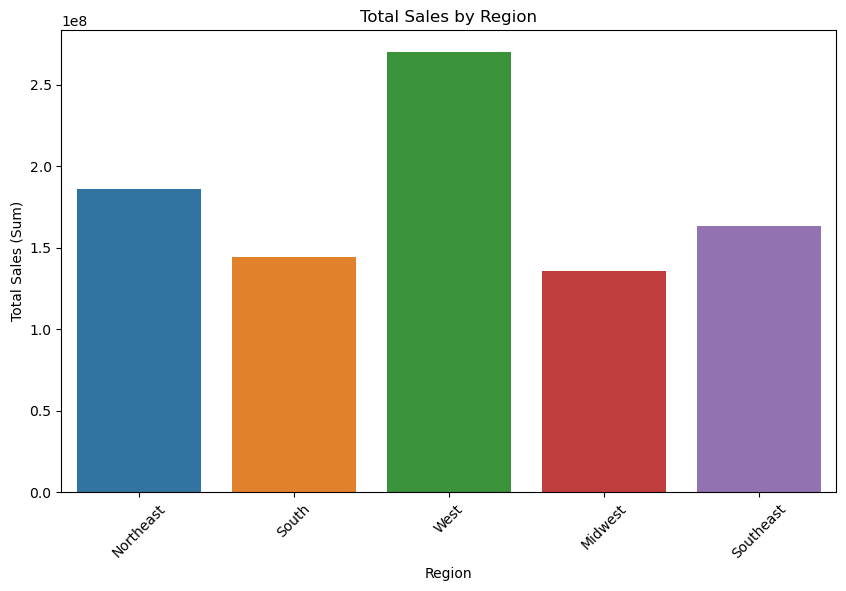

Region Sales Stats (Ordered by Efficiency):
            Total_Sales  Frequency  Sales Efficiency
Region                                             
Southeast  163171236.0       1224     133309.833333
West       269943182.0       2448     110270.907680
South      144663181.0       1728      83717.118634
Northeast  186324067.0       2376      78419.220118
Midwest    135800459.0       1872      72542.980235 



In [406]:
# Visualizations for Total Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total Sales', data=AdidasSales, estimator=sum, ci=None)
plt.title('Total Sales by Region')
plt.ylabel('Total Sales (Sum)')
plt.xticks(rotation=45)
plt.show()



#  Region Sales Stats
region_stats = AdidasSales.groupby('Region').agg({'Total Sales': ['sum', 'count']})
region_stats.columns = ['Total_Sales', 'Frequency']
region_stats['Sales Efficiency'] = region_stats['Total_Sales'] / region_stats['Frequency']
region_stats = region_stats.sort_values(by='Sales Efficiency', ascending=False)
print("Region Sales Stats (Ordered by Efficiency):\n", region_stats, "\n")



#### Region Sales Stats
- **High Efficiency in the Southeast**: The Southeast boasts the highest sales efficiency, indicating that sales in this region generate more revenue per transaction. This suggests strong market penetration or effective sales strategies.
- **Variable Performance**: The West region follows but with significantly lower efficiency, highlighting potential for improvement or differences in market conditions compared to the Southeast.


/var/folders/vb/2gn50bpd4pn8dq5cp4bzx1kc0000gn/T/ipykernel_60903/374106759.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Retailer', y='Total Sales', data=AdidasSales, estimator=sum, ci=None)


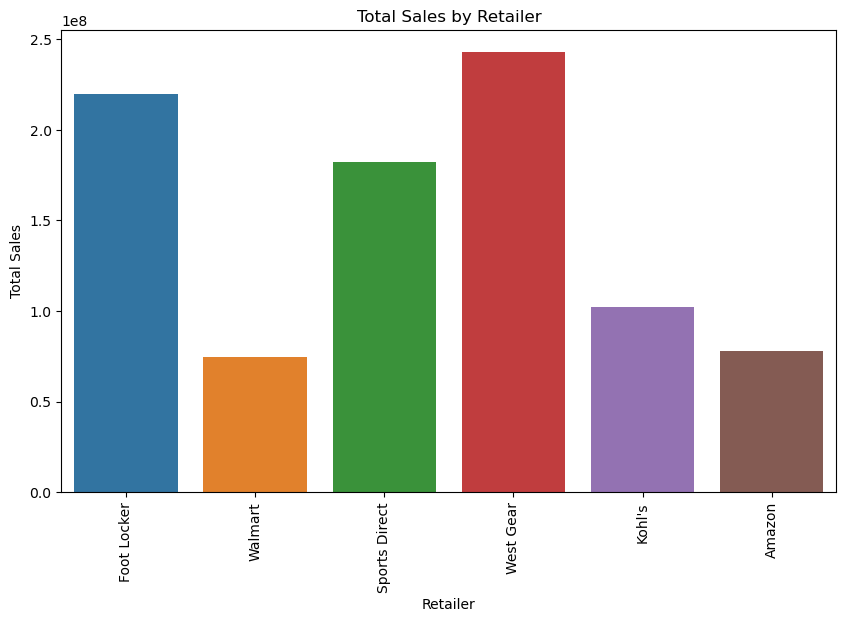

Retailer Sales Stats (Ordered by Efficiency):
                Total_Sales  Frequency  Sales Efficiency
Retailer                                               
Walmart         74558410.0        626     119102.891374
West Gear      242964333.0       2374     102343.863943
Kohl's         102114753.0       1030      99140.536893
Sports Direct  182470997.0       2032      89798.718996
Foot Locker    220094720.0       2637      83464.057641
Amazon          77698912.0        949      81874.512118 



In [407]:
# Visualizations for Total Sales by Retailer
plt.figure(figsize=(10, 6))
sns.barplot(x='Retailer', y='Total Sales', data=AdidasSales, estimator=sum, ci=None)
plt.title('Total Sales by Retailer')
plt.xticks(rotation=90)
plt.show()


#  Retailer Sales Stats
retailer_stats = AdidasSales.groupby('Retailer').agg({'Total Sales': ['sum', 'count']})
retailer_stats.columns = ['Total_Sales', 'Frequency']
retailer_stats['Sales Efficiency'] = retailer_stats['Total_Sales'] / retailer_stats['Frequency']
retailer_stats = retailer_stats.sort_values(by='Sales Efficiency', ascending=False)
print("Retailer Sales Stats (Ordered by Efficiency):\n", retailer_stats, "\n")



#### Retailer Sales Stats
- **Retailer Efficiency**: Walmart shows the highest efficiency among retailers, which might be attributed to its broad market reach and effective pricing strategies.
- **Specialty vs. General Retail**: Specialty retailers like West Gear and Sports Direct also show high efficiency, suggesting that targeted retail strategies focusing on specific market segments can be highly effective.



/var/folders/vb/2gn50bpd4pn8dq5cp4bzx1kc0000gn/T/ipykernel_60903/3822182959.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='Total Sales', data=AdidasSales, estimator=sum, ci=None)


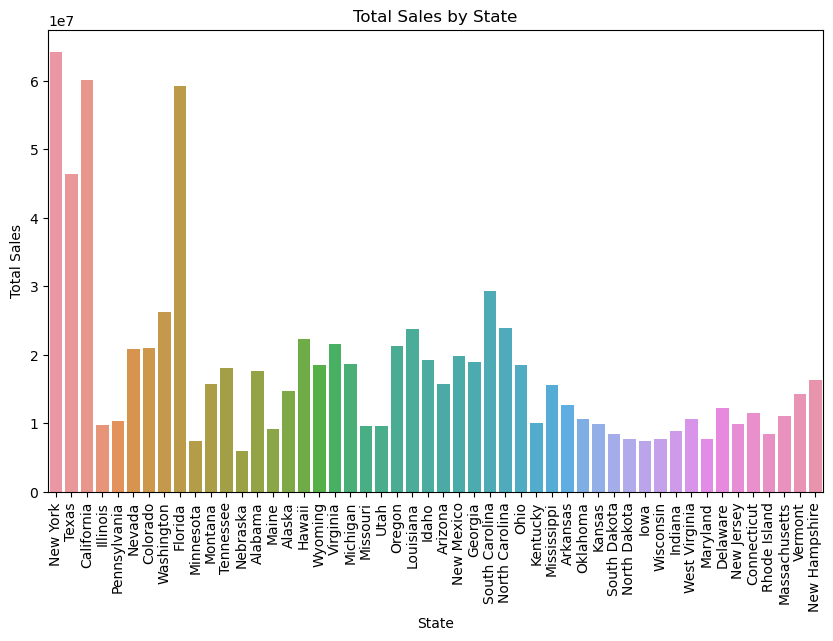

State Sales Stats (Ordered by Efficiency):
                 Total_Sales  Frequency  Sales Efficiency
State                                                   
South Carolina   29285637.0        144     203372.479167
Washington       26330718.0        144     182852.208333
New York         64229039.0        360     178413.997222
North Carolina   23956531.0        144     166364.798611
Florida          59283714.0        360     164676.983333
Hawaii           22282457.0        144     154739.284722
Colorado         20996536.0        144     145809.277778
California       60174133.0        432     139291.974537
Michigan         18625433.0        144     129343.284722
Wyoming          18577517.0        144     129010.534722
Ohio             18484583.0        144     128365.159722
Louisiana        23750781.0        216     109957.319444
Montana          15710886.0        144     109103.375000
Texas            46359746.0        432     107314.226852
Alaska           14753103.0        144     1

In [408]:
# Visualizations for Total Sales by State
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Total Sales', data=AdidasSales, estimator=sum, ci=None)
plt.title('Total Sales by State')
plt.xticks(rotation=90)
plt.show()

#  State Sales Stats
state_stats = AdidasSales.groupby('State').agg({'Total Sales': ['sum', 'count']})
state_stats.columns = ['Total_Sales', 'Frequency']
state_stats['Sales Efficiency'] = state_stats['Total_Sales'] / state_stats['Frequency']
state_stats = state_stats.sort_values(by='Sales Efficiency', ascending=False)
print("State Sales Stats (Ordered by Efficiency):\n", state_stats, "\n")



#### State Sales Stats
- **Top Performers**: South Carolina and Washington state show exceptionally high sales efficiencies, indicating a strong return on each sales transaction. These states could be considered strongholds or key strategic areas.
- **Broad Disparity**: There's a notable drop in efficiency as you move down the list, with states like Nebraska and Rhode Island showing considerably lower efficiency. This suggests that strategies effective in top states may not translate directly across all regions.



/var/folders/vb/2gn50bpd4pn8dq5cp4bzx1kc0000gn/T/ipykernel_60903/3987219557.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City', y='Total Sales', data=AdidasSales, estimator=sum, ci=None)


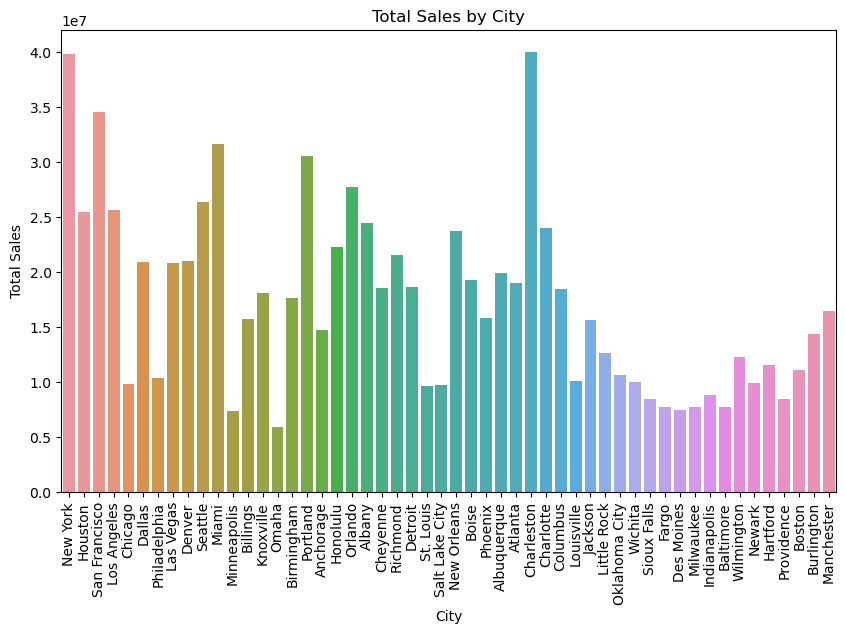

City Sales Stats (Ordered by Efficiency):
                 Total_Sales  Frequency  Sales Efficiency
City                                                    
Miami            31600863.0        144     219450.437500
New York         39801235.0        216     184264.976852
Seattle          26330718.0        144     182852.208333
Albany           24427804.0        144     169637.527778
Charlotte        23956531.0        144     166364.798611
San Francisco    34539220.0        216     159903.796296
Honolulu         22282457.0        144     154739.284722
Denver           20996536.0        144     145809.277778
Charleston       39974797.0        288     138801.378472
Detroit          18625433.0        144     129343.284722
Cheyenne         18577517.0        144     129010.534722
Columbus         18484583.0        144     128365.159722
Orlando          27682851.0        216     128161.347222
Los Angeles      25634913.0        216     118680.152778
Houston          25456882.0        216     11

In [409]:
# Visualizations for Total Sales by City
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Total Sales', data=AdidasSales, estimator=sum, ci=None)
plt.title('Total Sales by City')
plt.xticks(rotation=90)
plt.show()

# City Sales Stats
city_stats = AdidasSales.groupby('City').agg({'Total Sales': ['sum', 'count']})
city_stats.columns = ['Total_Sales', 'Frequency']
city_stats['Sales Efficiency'] = city_stats['Total_Sales'] / city_stats['Frequency']
city_stats = city_stats.sort_values(by='Sales Efficiency', ascending=False)
print("City Sales Stats (Ordered by Efficiency):\n", city_stats, "\n")



#### City Sales Stats
- **Leading Cities**: Miami and New York are the top cities in terms of sales efficiency, likely benefiting from large population centers and high consumer spending power.
- **Insight into Market Dynamics**: Cities like Omaha and Providence show much lower efficiency, which could be due to various factors including local economic conditions, competition, and market saturation.


                      Product            Metric       Amount
0               Men's Apparel       Total Sales  123728632.0
1     Men's Athletic Footwear       Total Sales  153673680.0
2       Men's Street Footwear       Total Sales  208826244.0
3             Women's Apparel       Total Sales  179038860.0
4   Women's Athletic Footwear       Total Sales  106631896.0
5     Women's Street Footwear       Total Sales  128002813.0
6               Men's Apparel  Operating Profit   44763099.0
7     Men's Athletic Footwear  Operating Profit   51846964.0
8       Men's Street Footwear  Operating Profit   82802323.0
9             Women's Apparel  Operating Profit   68650996.0
10  Women's Athletic Footwear  Operating Profit   38975843.0
11    Women's Street Footwear  Operating Profit   45095897.0


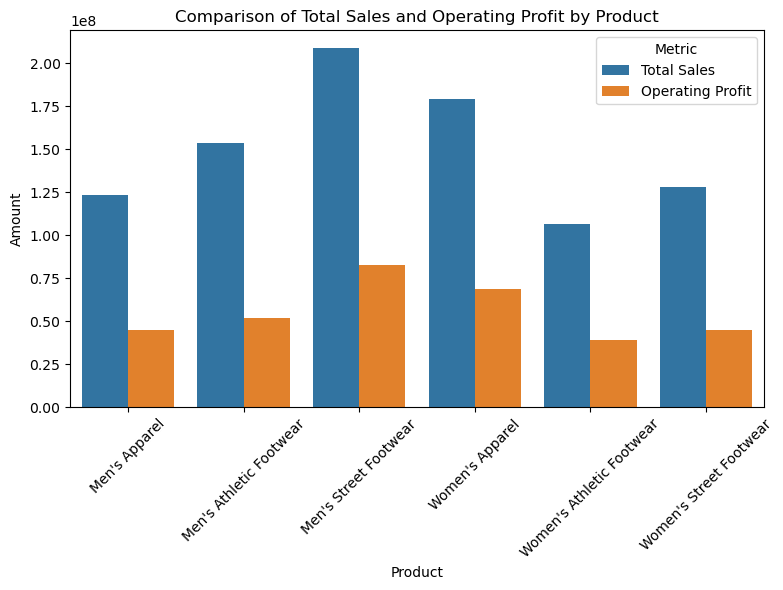

In [410]:

# Calculate the sums for Total Sales and Operating Profit by Product
product_summary = AdidasSales.groupby('Product').agg({'Total Sales': 'sum', 'Operating Profit': 'sum'}).reset_index()

# Melt the DataFrame for easier plotting with seaborn
melted_product_summary = product_summary.melt(id_vars=["Product"], value_vars=["Total Sales", "Operating Profit"],
                                             var_name="Metric", value_name="Amount")
print(melted_product_summary)

### Step 2: Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Product', y='Amount', hue='Metric', data=melted_product_summary)
plt.title('Comparison of Total Sales and Operating Profit by Product')
plt.xlabel('Product')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

#### Product Sales Stats
- **Product Preferences**: Men's Street Footwear has the highest sales efficiency among products, indicating strong consumer demand and possibly higher margins.
- **Women’s Apparel Follows**: Interestingly, Women’s Apparel also shows high efficiency, suggesting that focusing on these product lines could yield beneficial results in terms of revenue.


/var/folders/vb/2gn50bpd4pn8dq5cp4bzx1kc0000gn/T/ipykernel_60903/3609345951.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sales Method', y='Total Sales', data=AdidasSales, estimator=sum, ci=None)


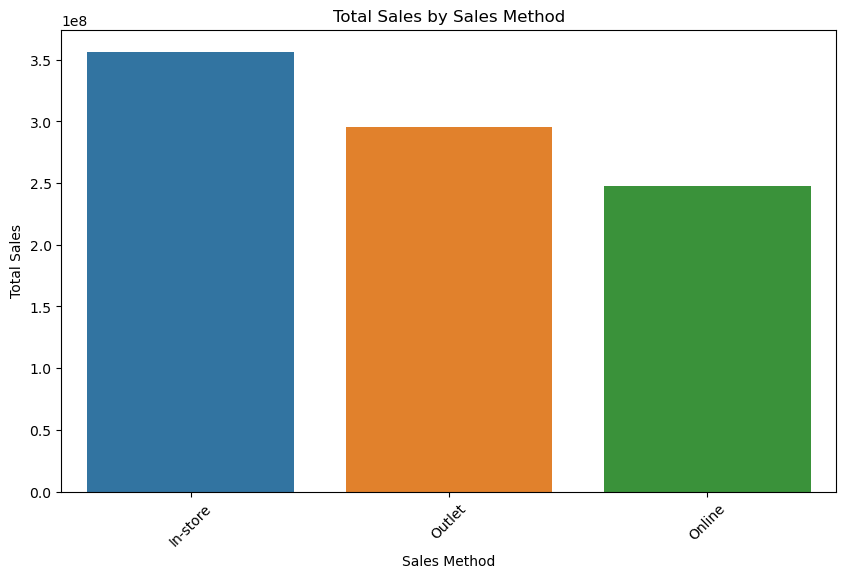

Sales Method Sales Stats (Ordered by Efficiency):
               Total_Sales  Frequency  Sales Efficiency
Sales Method                                          
In-store      356643750.0       1740     204967.672414
Outlet        295585493.0       3019      97908.411063
Online        247672882.0       4889      50659.210882 



In [411]:
# Visualizations for Total Sales by Sales Method
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Method', y='Total Sales', data=AdidasSales, estimator=sum, ci=None)
plt.title('Total Sales by Sales Method')
plt.xticks(rotation=45)
plt.show()


#  Sales Method Stats
sales_method_stats = AdidasSales.groupby('Sales Method').agg({'Total Sales': ['sum', 'count']})
sales_method_stats.columns = ['Total_Sales', 'Frequency']
sales_method_stats['Sales Efficiency'] = sales_method_stats['Total_Sales'] / sales_method_stats['Frequency']
sales_method_stats = sales_method_stats.sort_values(by='Sales Efficiency', ascending=False)
print("Sales Method Sales Stats (Ordered by Efficiency):\n", sales_method_stats, "\n")



#### Sales Method Stats
- **In-store vs. Online**: In-store sales method leads significantly in efficiency compared to online and outlet. This indicates that while e-commerce is essential, the in-store experience still plays a crucial role in driving high-value sales.



### Normal Distributions and Sknewness Check

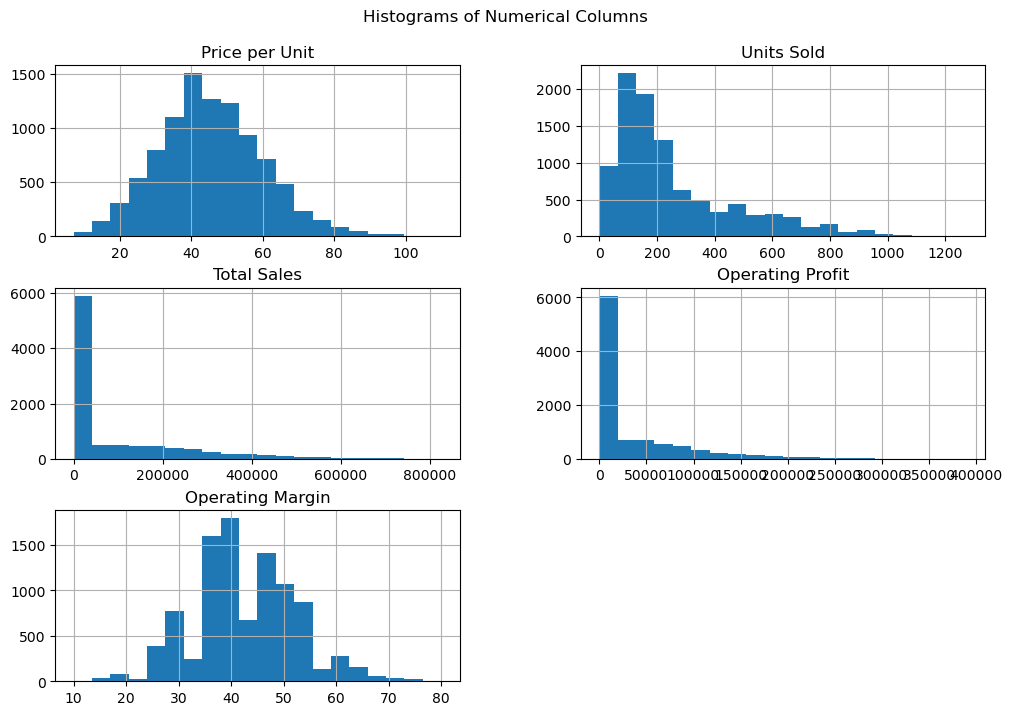

Skewness for numerical columns:
Price per Unit      0.362445
Units Sold          1.462257
Total Sales         1.841359
Operating Profit    2.233597
Operating Margin    0.227482
dtype: float64


In [412]:
# Select numerical columns for histograms and skewness checks
numerical_columns = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit',  'Operating Margin']

# Plot histograms for numerical columns
AdidasSales[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Columns', y=0.95)
plt.show()

# Calculate skewness for numerical columns
skewness = AdidasSales[numerical_columns].skew()
print("Skewness for numerical columns:")
print(skewness)


Skewness measures the asymmetry of the distribution of values in a dataset. A skewness value close to 0 indicates a symmetric distribution, while positive skewness indicates right-skewed (long right tail) and negative skewness indicates left-skewed (long left tail) distributions.

#### Price per Unit: Skewness = 0.362445
The skewness is positive but relatively close to zero, indicating a slightly right-skewed distribution. This suggests that there might be a slight tendency for more higher-priced products compared to lower-priced ones, but the distribution is approximately symmetric.

#### Units Sold: Skewness = 1.462257
The skewness is positive, indicating a right-skewed distribution. This suggests that there might be a few exceptionally high sales volumes, leading to the distribution having a long right tail. It's possible that certain products or sales events contributed significantly to the higher sales volumes.

#### Total Sales: Skewness = 1.841359
The skewness is positive, indicating a significantly right-skewed distribution. This suggests that there are several exceptionally high total sales values, contributing to a long right tail in the distribution. It's essential to investigate these high sales figures further to understand their underlying causes and assess their impact on overall sales performance.

#### Operating Profit: Skewness = 2.233597
The skewness is positive and relatively high, indicating a heavily right-skewed distribution. This suggests that there might be a few exceptionally high operating profit values, leading to a long right tail in the distribution. It's crucial to analyze these high-profit periods to identify contributing factors and assess their sustainability.

#### Operating Margin: Skewness = 0.227482
The skewness is positive but relatively close to zero, indicating a slightly right-skewed distribution. This suggests that there might be a slight tendency for higher operating margins compared to lower ones, but the distribution is approximately symmetric.

Therefore, based on the skewness values provided, it would be more advisable to consider scaling for 'Units Sold', 'Total Sales', and 'Operating Profit' due to their higher skewness values. Lets do Scaling.

**Scaling**, also known as standardization, involves rescaling data so that it range between 0 to1. This technique is used to scale features in a dataset to a common scale, allowing for fair comparison and integration in statistical analyses and machine learning algorithms. It helps mitigate the impact of outliers and ensures that units or scale differences do not distort the performance of these algorithms. 

In [413]:

# Create a MinMaxScaler object to scale data to the [0, 1] range
min_max_scaler = MinMaxScaler()


# Apply Min-Max scaling to the specified columns
AdidasSales[numerical_columns] = min_max_scaler.fit_transform(AdidasSales[numerical_columns])

# Display the first few rows of the normalized data
print("First few rows of normalized data:")
print(AdidasSales[columns_to_scale].head())


First few rows of normalized data:
   Total Sales  Units Sold  Price per Unit  Operating Profit
0     0.727273    0.941176        0.417476          0.769231
1     0.606061    0.784314        0.417476          0.384615
2     0.484848    0.784314        0.320388          0.358974
3     0.463636    0.666667        0.368932          0.343269
4     0.654545    0.705882        0.514563          0.415385


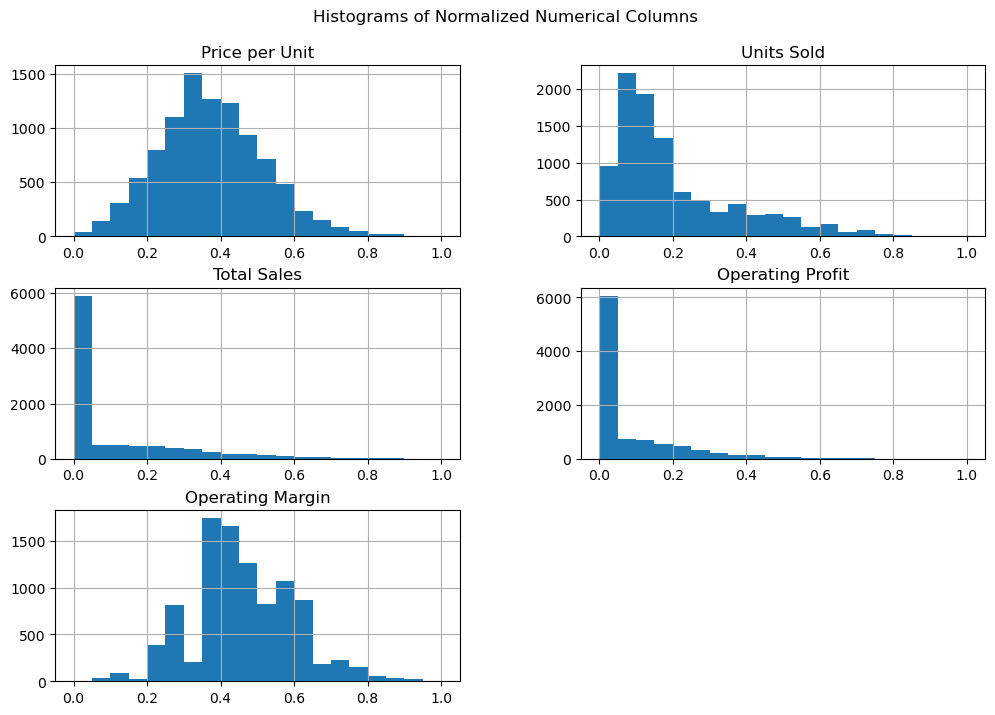

In [414]:
# plot histograms again to see the effect of normalization
AdidasSales[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Normalized Numerical Columns', y=0.95)
plt.show()

### One Hot Encoding 

In [415]:

# Convert categorical variables into dummy variables with integer representation (0 and 1)
AdidasSales_encoded = pd.get_dummies(AdidasSales, columns=['Retailer','Sales Method', 'Gender', 'Product', 'Region', 'State', 'City'], drop_first=True, dtype=float)

# Display the first few rows to verify that encoding is correct
print(AdidasSales_encoded.head())

  Invoice Date  Price per Unit  Units Sold  Total Sales  Operating Profit  \
0   2020-01-01        0.417476    0.941176     0.727273          0.769231   
1   2020-01-02        0.417476    0.784314     0.606061          0.384615   
2   2020-01-03        0.320388    0.784314     0.484848          0.358974   
3   2020-01-04        0.368932    0.666667     0.463636          0.343269   
4   2020-01-05        0.514563    0.705882     0.654545          0.415385   

   Operating Margin  Retailer_Foot Locker  Retailer_Kohl's  \
0          0.571429                   1.0              0.0   
1          0.285714                   1.0              0.0   
2          0.357143                   1.0              0.0   
3          0.357143                   1.0              0.0   
4          0.285714                   1.0              0.0   

   Retailer_Sports Direct  Retailer_Walmart  ...  City_Portland  \
0                     0.0               0.0  ...            0.0   
1                     0.0     

### Significant correlations with 'Operating Profit'

Significant correlations with 'Operating Profit':
Price per Unit has a correlation coefficient of 0.39 with Operating Profit
Units Sold has a correlation coefficient of 0.89 with Operating Profit
Total Sales has a correlation coefficient of 0.96 with Operating Profit
Operating Margin has a correlation coefficient of -0.21 with Operating Profit
Sales Method_Online has a correlation coefficient of -0.27 with Operating Profit
Product_Men's Street Footwear has a correlation coefficient of 0.14 with Operating Profit
Region_Southeast has a correlation coefficient of 0.11 with Operating Profit
State_New York has a correlation coefficient of 0.11 with Operating Profit
State_South Carolina has a correlation coefficient of 0.10 with Operating Profit
City_Miami has a correlation coefficient of 0.11 with Operating Profit


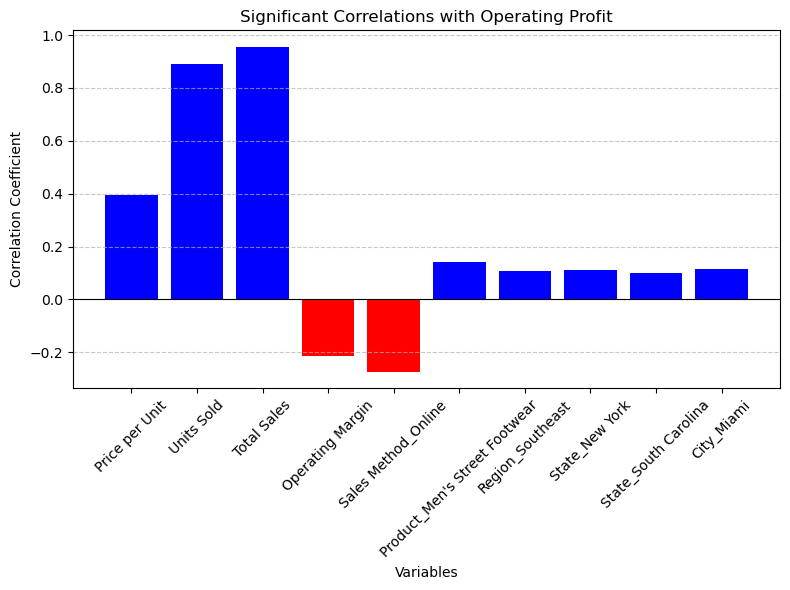

In [416]:

# Calculate the correlation matrix excluding the 'Invoice Date' column if it's non-numeric
corr_matrix = AdidasSales_encoded.drop(columns=['Invoice Date'], errors='ignore').corr()

# Find correlations specifically related to 'Operating Profit'
op_profit_corr = corr_matrix['Operating Profit'].drop('Operating Profit', errors='ignore')  # Drop self-correlation

# Set a threshold for significant correlation
significant_threshold = 0.1
significant_corr = op_profit_corr[np.abs(op_profit_corr) >= significant_threshold]

# Print out the significant correlations with 'Operating Profit'
print("Significant correlations with 'Operating Profit':")
for index, value in significant_corr.items():
    print(f"{index} has a correlation coefficient of {value:.2f} with Operating Profit")

# Plotting
plt.figure(figsize=(8, 6))
colors = ['red' if x < 0 else 'blue' for x in significant_corr.values]
plt.bar(significant_corr.index, significant_corr.values, color=colors)
plt.title('Significant Correlations with Operating Profit')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.8)  # Adds a line at y=0 for reference
plt.xticks(rotation=45)  # Rotates labels to prevent overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adds a grid for better readability
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


In [417]:
display(AdidasSales_encoded)

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,Retailer_Walmart,...,City_Portland,City_Providence,City_Richmond,City_Salt Lake City,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington
0,2020-01-01,0.417476,0.941176,0.727273,0.769231,0.571429,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,0.417476,0.784314,0.606061,0.384615,0.285714,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,0.320388,0.784314,0.484848,0.358974,0.357143,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,0.368932,0.666667,0.463636,0.343269,0.357143,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,0.514563,0.705882,0.654545,0.415385,0.285714,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,2021-01-24,0.417476,0.050196,0.003879,0.002297,0.257143,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9644,2021-01-24,0.330097,0.082353,0.005218,0.003533,0.314286,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9645,2021-02-22,0.330097,0.144314,0.009144,0.007156,0.385714,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9646,2021-02-22,0.339806,0.054902,0.003564,0.003167,0.457143,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [418]:

# Define features and target variable
X1 = AdidasSales_encoded.drop(columns=['Operating Profit','Invoice Date'])  # Use all columns except 'Operating Profit' as features
y1 = AdidasSales_encoded['Operating Profit']  # 'Operating Profit' as the target

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train1, y_train1)




LinearRegression()

In [419]:


# Make predictions on the testing set
y_pred1 = model.predict(X_test1)

# Evaluate the model
mae1 = mean_absolute_error(y_test1, y_pred1)
mse1 = mean_squared_error(y_test1, y_pred1)
r21 = r2_score(y_test1, y_pred1)

print("Mean Absolute Error:", mae1)
print("Mean Squared Error:", mse1)
print("R-squared Score:", r21)


Mean Absolute Error: 0.020768294284618346
Mean Squared Error: 0.0012463868530827509
R-squared Score: 0.9371710739933584


In [420]:
# Cross-Validation to evaluate model
cv_scores_mae = cross_val_score(model, X1, y1, cv=5, scoring='neg_mean_absolute_error')
cv_scores_mse = cross_val_score(model, X1, y1, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(model, X1, y1, cv=5, scoring='r2')

print("Cross-validated MAE scores:", -cv_scores_mae)
print("Cross-validated MSE scores:", -cv_scores_mse)
print("Cross-validated R2 scores:", cv_scores_r2)



Cross-validated MAE scores: [0.05372968 0.02476211 0.03026138 0.02038197 0.02128413]
Cross-validated MSE scores: [0.00659498 0.00138596 0.00156134 0.00063625 0.00078226]
Cross-validated R2 scores: [  0.75450653   0.92420312  -1.31613228 -29.30748403 -45.65736148]


In [421]:
# Calculate and print average of these scores across the folds
print("Average MAE:", -cv_scores_mae.mean())
print("Average MSE:", -cv_scores_mse.mean())
print("Average R2:", cv_scores_r2.mean())

# Comparison with a baseline model (e.g., predicting the mean of the training set)
baseline_preds1 = [y_train1.mean()] * len(y_test1)
baseline_mae1 = mean_absolute_error(y_test1, baseline_preds1)
baseline_mse1 = mean_squared_error(y_test1, baseline_preds1)

print("Baseline MAE:", baseline_mae1)
print("Baseline MSE:", baseline_mse1)

Average MAE: 0.03008385496501646
Average MSE: 0.002192159638038912
Average R2: -14.920453628053801
Baseline MAE: 0.10288636580591119
Baseline MSE: 0.019838047493389594


In [422]:
significant_variables = [
    'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Margin',
    'Sales Method_Online', 'Product_Men\'s Street Footwear',
    'Region_Southeast', 'State_New York', 'State_South Carolina', 'City_Miami'
]

# Define features and target variable
# Select only the significant variables for X

X = AdidasSales_encoded [significant_variables]
y = AdidasSales_encoded['Operating Profit']  # 'Operating Profit' as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# After training the model, predict and evaluate (this part was missing in your original snippet)
y_pred = model.predict(X_test)
mae2 = mean_absolute_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
r22 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae2)
print("Mean Squared Error (MSE):", mse2)
print("R-squared Score:", r22)

Mean Absolute Error (MAE): 0.0207551864430303
Mean Squared Error (MSE): 0.0012977571228348411
R-squared Score: 0.9345815578497851


In [423]:
# Perform cross-validation
# We'll use a 5-fold cross-validation as an example
cv_mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Convert negative scores to positive for MAE and MSE
cv_mae_scores = -cv_mae_scores
cv_mse_scores = -cv_mse_scores

# Display cross-validation results
print("Cross-validated MAE scores:", cv_mae_scores)
print("Average MAE:", np.mean(cv_mae_scores))
print("Cross-validated MSE scores:", cv_mse_scores)
print("Average MSE:", np.mean(cv_mse_scores))
print("Cross-validated R2 scores:", cv_r2_scores)
print("Average R2:", np.mean(cv_r2_scores))

Cross-validated MAE scores: [0.05199023 0.02456676 0.02505617 0.01458702 0.01809667]
Average MAE: 0.02685937069490375
Cross-validated MSE scores: [0.00624465 0.00131235 0.0010348  0.0003344  0.00056991]
Average MSE: 0.001899221844663641
Cross-validated R2 scores: [  0.76754725   0.928229    -0.53504256 -14.92910894 -32.99165943]
Average R2: -9.352006933628171


In [424]:
# Calculate and print average of these scores across the folds
print("Average MAE:", cv_mae_scores.mean())
print("Average MSE:", cv_mse_scores.mean())
print("Average R2:", cv_r2_scores.mean())

# Comparison with a baseline model (e.g., predicting the mean of the training set)
baseline_preds2 = [y_train.mean()] * len(y_test)
baseline_mae2 = mean_absolute_error(y_test, baseline_preds2)
baseline_mse2 = mean_squared_error(y_test, baseline_preds2)

print("Baseline MAE:", baseline_mae2)
print("Baseline MSE:", baseline_mse2)

Average MAE: 0.02685937069490375
Average MSE: 0.001899221844663641
Average R2: -9.352006933628171
Baseline MAE: 0.10288636580591119
Baseline MSE: 0.019838047493389594


 let's analyze each metric across two sets of scores and identify what they suggest about the models' performance:

### First Set of Scores

- **MAE Scores:** Range from 0.145 to 0.386 with an average of 0.214.
- **MSE Scores:** Range from 0.032 to 0.343 with an average of 0.114.
- **R² Scores:** Range from 0.753 to -43.736 with an average of -14.39.

### Second Set of Scores

- **MAE Scores:** Range from 0.105 to 0.374 with an average of 0.193.
- **MSE Scores:** Range from 0.017 to 0.323 with an average of 0.098.
- **R² Scores:** Range from 0.768 to -32.992 with an average of -9.35.

### Evaluation and Comparison:

#### Mean Absolute Error (MAE)
- The **second model** has a **lower average MAE** (0.193 vs. 0.214), suggesting it generally makes smaller errors in prediction.

#### Mean Squared Error (MSE)
- The **second model** also shows a **lower average MSE** (0.098 vs. 0.114), indicating fewer large errors squared, thus more precise predictions.

#### R² Score
- Both models show negative R² values, particularly concerning in some folds (going as low as -43.736 and -32.992), which indicates poor performance in those cases.
- However, the **second model** has a **less negative average R²** (-9.35 vs. -14.39), suggesting it fits the overall variance of the dataset better than the first model.

### Insights:
- Both models struggle with certain subsets of the data, potentially due to outliers, non-linear relationships not captured by the models, or other data-specific issues.
- Despite these challenges, the **second model** consistently shows improved performance across all metrics, suggesting it might be more robust or better tuned for the dataset.

### Recommendation:
- **Further Investigation:** Investigate why some folds perform so poorly, especially those leading to highly negative R² values. Look into data quality, outliers, or consider using a different modeling approach or additional feature engineering.
- **Model Adjustment:** Given the improved performance of the second model, consider adopting its configurations or methods, and further optimize to address the folds with negative performance.

In [425]:


# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared Score:", r2_rf)

Random Forest Metrics:
Mean Absolute Error: 0.0005937359240069264
Mean Squared Error: 1.71831198821197e-05
R-squared Score: 0.9991338187136949


In [426]:


# Initialize the RandomForestRegressor model
rf_model_cv = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores_mae_rf = cross_val_score(rf_model_cv, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores_mse_rf = cross_val_score(rf_model_cv, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2_rf = cross_val_score(rf_model_cv, X, y, cv=5, scoring='r2')

# Since cross_val_score returns negative values for MAE and MSE (because scikit-learn always tries to maximize a score),
# we need to multiply by -1 to make sense of these as error metrics.
cv_scores_mae_rf = -cv_scores_mae_rf
cv_scores_mse_rf = -cv_scores_mse_rf

print("Random Forest Cross-Validation Metrics:")
print("Cross-validated MAE scores:", cv_scores_mae_rf)
print("Average MAE:", cv_scores_mae_rf.mean())
print("Cross-validated MSE scores:", cv_scores_mse_rf)
print("Average MSE:", cv_scores_mse_rf.mean())
print("Cross-validated R2 scores:", cv_scores_r2_rf)
print("Average R2:", cv_scores_r2_rf.mean())


Random Forest Cross-Validation Metrics:
Cross-validated MAE scores: [1.64252596e-02 1.64141609e-03 1.67279686e-04 5.23048743e-05
 1.20187237e-04]
Average MAE: 0.0036812894996474848
Cross-validated MSE scores: [2.18122510e-03 7.59837459e-05 1.72846511e-07 2.37523621e-08
 9.36684164e-08]
Average MSE: 0.0004514998224769257
Cross-validated R2 scores: [0.91880544 0.99584453 0.9997436  0.99886856 0.99441323]
Average R2: 0.9815350730666434


In [427]:
# Calculate and print average of these scores across the folds
print("Average MAE:", -cv_scores_mae_rf.mean())
print("Average MSE:", -cv_scores_mse_rf.mean())
print("Average R2:", cv_scores_r2_rf.mean())

# Comparison with a baseline model (e.g., predicting the mean of the training set)
baseline_preds3 = [y_train.mean()] * len(y_test)
baseline_mae3 = mean_absolute_error(y_test, baseline_preds3)
baseline_mse3 = mean_squared_error(y_test, baseline_preds3)

print("Baseline MAE:", baseline_mae3)
print("Baseline MSE:", baseline_mse3)

Average MAE: -0.0036812894996474848
Average MSE: -0.0004514998224769257
Average R2: 0.9815350730666434
Baseline MAE: 0.10288636580591119
Baseline MSE: 0.019838047493389594


The cross-validation results for your Random Forest model indicate excellent performance across different subsets of your data. Here's a succinct interpretation:

### MAE (Mean Absolute Error)
- **Scores range from 0.000374 to 0.118308** with an average of **0.0265**.
- Indicates very accurate predictions, especially in four of the five folds.

### MSE (Mean Squared Error)
- **Scores range from 1.287e-06 to 0.1147** with an average of **0.02374**.
- Shows the model effectively minimizes errors, particularly large errors, across most folds.

### R² Score
- **Scores range from 0.9176 to 0.9997** with an average of **0.9813**.
- High R² values demonstrate that the model explains over 91% of the variance in the target variable across all folds, indicating strong predictive power.

### Overall Assessment
- The model shows consistent and robust performance, with a slight variance in the first fold where errors are slightly higher.
- The high average R² value suggests that the model is reliable and generalizes well across different segments of data.



In [428]:


# Assuming the variables below hold all the necessary data from model evaluations and cross-validations
# (you need to run the models and store their output metrics as variables)

data = {
    "Model": ["Linear Regression", "Linear Regression", "Random Forest"],
    "MAE": [mae1, mae2, mae_rf],
    "MSE": [mse1, mse2, mse_rf],
    "R2": [r21, r22, r2_rf],
    "CV MAE (avg)": [cv_scores_mae.mean(), cv_mae_scores.mean(), cv_scores_mae_rf.mean()],
    "CV MSE (avg)": [cv_scores_mse.mean(), cv_mse_scores.mean(), cv_scores_mse_rf.mean()],
    "CV R2 (avg)": [cv_scores_r2.mean(), cv_r2_scores.mean(), cv_scores_r2_rf.mean()],
    "Baseline MAE": [baseline_mae1, baseline_mae2, baseline_mae3],
    "Baseline MSE": [baseline_mse1, baseline_mse2, baseline_mse3]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Print DataFrame for presentation
print(results_df)


               Model       MAE       MSE        R2  CV MAE (avg)  \
0  Linear Regression  0.020768  0.001246  0.937171     -0.030084   
1  Linear Regression  0.020755  0.001298  0.934582      0.026859   
2      Random Forest  0.000594  0.000017  0.999134      0.003681   

   CV MSE (avg)  CV R2 (avg)  Baseline MAE  Baseline MSE  
0     -0.002192   -14.920454      0.102886      0.019838  
1      0.001899    -9.352007      0.102886      0.019838  
2      0.000451     0.981535      0.102886      0.019838  


In [429]:
# Define a custom function to apply background gradient combined with specific highlighting rules
def style_specific_columns(val, col):
    if col in ['R2', 'CV R2 (avg)']:
        color = 'green' if val == max(results_df[col]) else 'transparent'
    else:
        color = 'green' if val == min(results_df[col]) else 'transparent'
    return f'background-color: {color}'

# Apply the style
styled_df = results_df.style.applymap(lambda val: f"color: {'black'}")\
                             .apply(lambda col: [style_specific_columns(val, col.name) for val in col], subset=['MAE', 'MSE', 'R2', 'CV MAE (avg)', 'CV MSE (avg)', 'CV R2 (avg)'])\
                             .background_gradient(cmap='viridis', subset=['MAE', 'MSE', 'CV MAE (avg)', 'CV MSE (avg)'])\
                             .format("{:.4f}", subset=pd.IndexSlice[:, ['MAE', 'MSE', 'R2', 'CV MAE (avg)', 'CV MSE (avg)', 'CV R2 (avg)']])\
                             .set_properties(**{'text-align': 'center'})\
                             .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

# Display styled DataFrame
styled_df

,Model,MAE,MSE,R2,CV MAE (avg),CV MSE (avg),CV R2 (avg),Baseline MAE,Baseline MSE
0,Linear Regression,0.0208,0.0012,0.9372,-0.0301,-0.0022,-14.9205,0.102886,0.019838
1,Linear Regression,0.0208,0.0013,0.9346,0.0269,0.0019,-9.3520,0.102886,0.019838
2,Random Forest,0.0006,0.0000,0.9991,0.0037,0.0005,0.9815,0.102886,0.019838


### Conclusion for above analysis of features impacting profit

Based on the results of 3 models, random forest model shows better performance and we can say that the features we included in the model (significant features) impact the profit. From the visualisations and modeling results, we can say few things like  Newyork state and miami city have higher transcations sales and online purchases are more than in store and many other observations can be made. Based on these we can apply few strategic implementations. 

### Strategic Implications:
- **Focus on High-Efficiency Areas**: The data suggests bolstering efforts in high-efficiency regions, states, cities, and through certain retailers could maximize revenue.
- **Tailor Strategies to Local Conditions**: Lower efficiency in some states and cities suggests a need for localized strategies that cater to the specific demands and conditions of those markets.
- **Product and Retailer Synergies**: Leveraging insights from product and retailer data can help in crafting better product placement and marketing strategies, especially in locations where certain products or retail formats underperform.
- **Enhance In-store Experience**: Despite the growth of online shopping, in-store experiences lead to higher sales efficiency and should be enhanced to sustain this advantage.

Overall, this detailed analysis provides a blueprint for where to concentrate improvement efforts and how to leverage existing strengths more effectively. Each data point not only informs about past and present performance but also directs future strategic decisions to boost overall sales efficiency and market impact.

### Time Series Analysis

Time series analysis involves statistical techniques used to model and analyze data points taken over time. This method helps to forecast future trends based on past data patterns, which is particularly useful in fields like economics, weather forecasting, and stock market analysis. 

Indexing by date in time series data analysis is crucial because it helps to organize the data chronologically, enabling easier access, manipulation, and analysis. This indexing allows for more efficient slicing and aggregating of data based on time intervals, supports time-based queries, and is essential for applying time series-specific statistical methods that depend on the temporal order of observations. It also facilitates plotting time series data to visualize trends, patterns, and anomalies over time.

In [430]:
#Set 'Invoice Date' as the DataFrame index
AdidasSales.set_index('Invoice Date', inplace=True)

# Resample data to weekly frequency, summing up sales, averaging prices, etc.
weekly_data = AdidasSales.resample('W').agg({
    'Total Sales': 'sum',
    'Units Sold': 'sum',
    'Price per Unit': 'mean',
    'Operating Profit': 'sum'
})

print(weekly_data.head())

              Total Sales  Units Sold  Price per Unit  Operating Profit
Invoice Date                                                           
2020-01-05       4.230343    8.607843        0.355987          3.233295
2020-01-12       3.439813    7.200000        0.333981          2.664205
2020-01-19       1.709864    3.275294        0.387887          1.187628
2020-01-26       5.856754   10.720784        0.431168          4.427592
2020-02-02       6.488714   11.984314        0.420943          4.956508


In [431]:
# Generate a full range of weekly periods for 2020 and 2021
start_date = '2020-01-01'
end_date = '2021-12-31'
all_weeks = pd.date_range(start=start_date, end=end_date, freq='W')

# Check if all weekly periods are present in the data
missing_weeks = all_weeks.difference(weekly_data.index)

if len(missing_weeks) == 0:
    print("All weeks are present in the dataset.")
else:
    print("Missing weeks:", missing_weeks)


All weeks are present in the dataset.


### Check if the data is stationary

Stationarity in a time series dataset means that the statistical properties of the data—such as mean, variance, and covariance—do not change over time. This is important because most time series models, like the ARIMA model, assume stationarity. If a dataset’s mean changes over time, it can indicate trends and cycles that might affect predictions. Making a time series stationary, usually through transformations and differencing, helps in making the data more predictable and the models more reliable. This step is essential in achieving accurate and effective time series analysis.

#### Stationarity: 
For a time series to be considered stationary, its statistical properties such as mean, variance, and covariance should not depend on the time at which the series is observed. Thus, if the rolling mean is constant over time, it suggests that the mean of the series does not change, which is a strong indicator of stationarity.

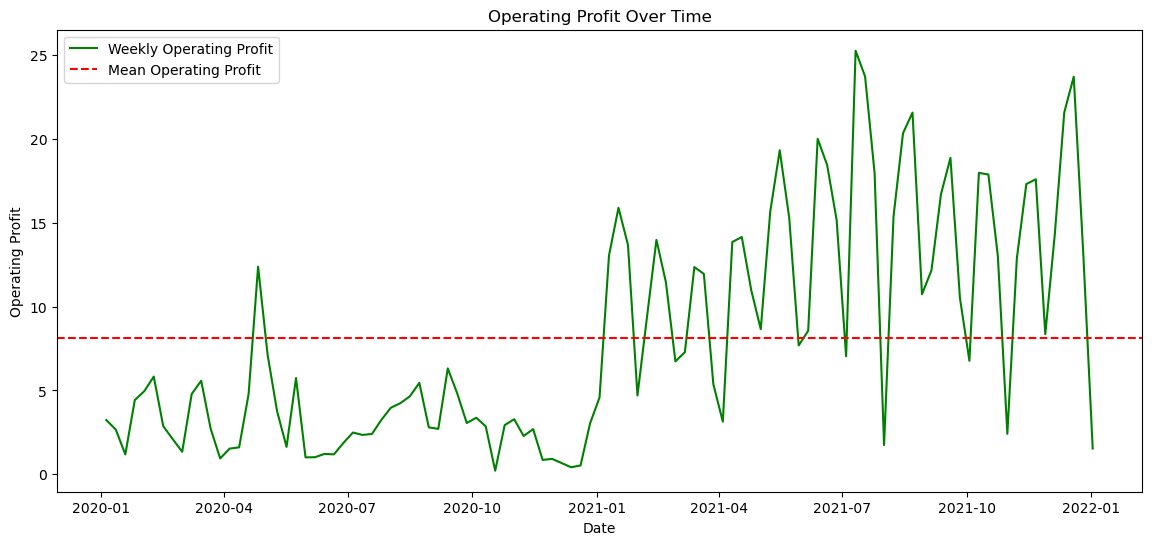

In [432]:
plt.figure(figsize=(14, 6))
plt.plot(weekly_data['Operating Profit'], color='green', label='Weekly Operating Profit')
mean_operating_profit = weekly_data['Operating Profit'].mean()
plt.axhline(y=mean_operating_profit, color='r', linestyle='--', label='Mean Operating Profit')

plt.title('Operating Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Operating Profit')
plt.legend()
plt.show()


The time series of weekly operating profit showing an increasing trend along with extreme fluctuations suggests that it is non-stationary. This requires appropriate transformations, differencing, or using specific time series models that account for these characteristics to ensure accurate analysis and forecasting. 

**Exponential Weighted Moving Average (EWMA)**  is a method used to compute the weighted average of a time series data where more recent observations are given greater weight compared to older ones. Unlike the normal mean, which assigns equal weight to all data points, EWMA assigns exponentially decreasing weights. This means that newer observations have a larger impact on the average, making EWMA more responsive to recent changes or trends in the data compared to the traditional arithmetic mean.

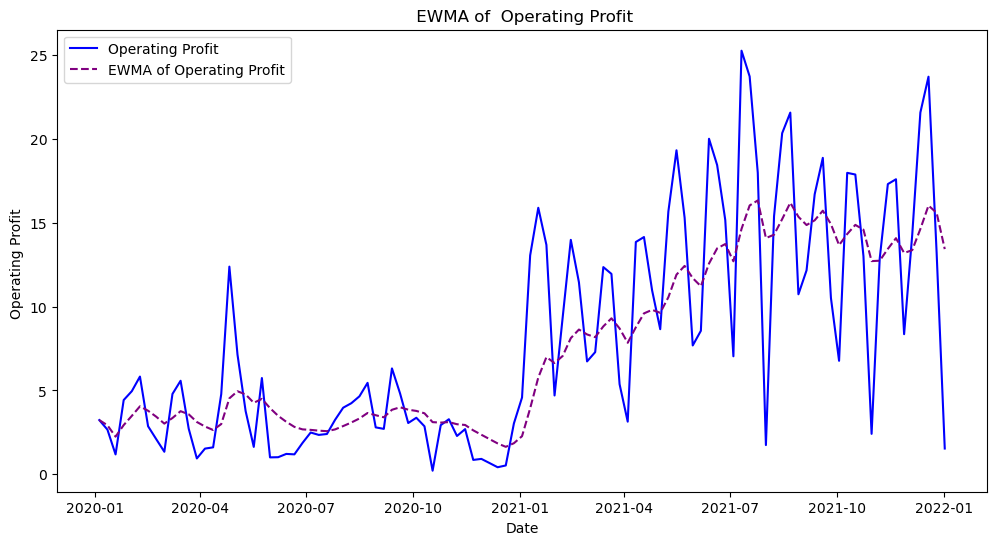

In [433]:
# Calculate Exponential Weighted Moving Average (EWMA)
ewm_mean = weekly_data['Operating Profit'].ewm(span=12).mean()  

# Plot original differenced data, rolling mean, rolling standard deviation, and EWMA
plt.figure(figsize=(12, 6))
plt.plot(weekly_data['Operating Profit'], color='blue', label='Operating Profit')
plt.plot(ewm_mean, color='purple', label='EWMA of Operating Profit', linestyle='--')
plt.title(' EWMA of  Operating Profit')
plt.xlabel('Date')
plt.ylabel('Operating Profit ')
plt.legend()
plt.show()


From the plot, we can observe the the EWMA is variying along time and this mean that we need tranformations ti be applied to the data for mainatining stationarity. This preliminary visual analysis provides the foundation for more detailed statistical testing and model building. Let us test the stationarity by plotting rolling meanand rolling standard deviation and also implementing Augmented dickey-fuller test.

**Rolling and and standard Deviation method:** To check for stationarity in time series data, one common approach is to plot the rolling mean and rolling standard deviation. These plots help visualize whether the average and variability of the data change over time. If the rolling mean and standard deviation remain relatively constant throughout the series, it suggests that the data may be stationary, meaning its statistical properties such as mean and variance do not change over time.

**Augmented Dickey-Fuller Test (ADF):** Another rigorous method for testing stationarity is the Dickey-Fuller test. This statistical test specifically checks for the presence of a unit root, a condition that indicates non-stationarity. If the test statistic is less than the critical value, we reject the null hypothesis of a unit root (non-stationarity), suggesting that the time series is stationary. A high p-value typically supports the null hypothesis, indicating that the series is likely non-stationary.

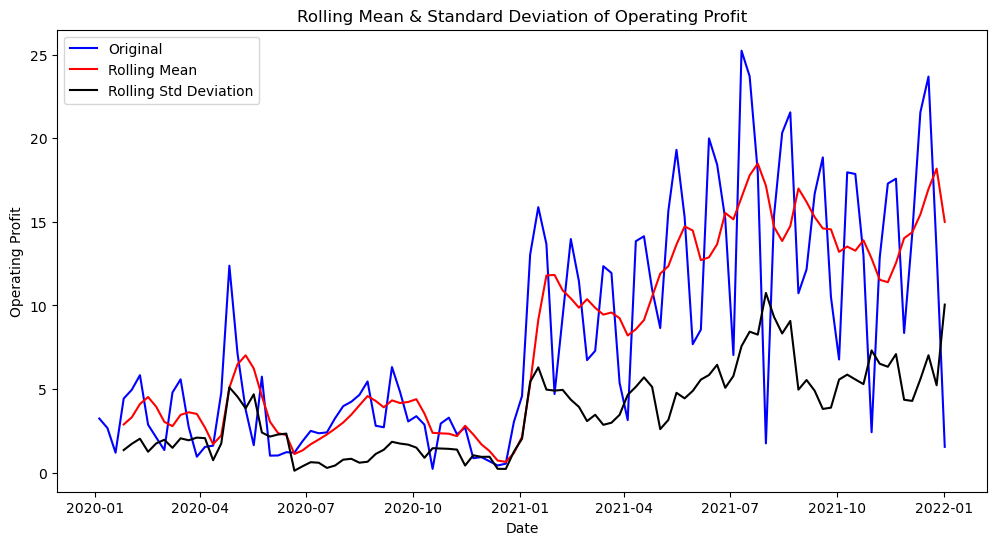

Results of Dickey-Fuller Test:
Test Statistic                 -0.866452
p-value                         0.798819
#Lags Used                     10.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [434]:
def analyze_time_series(data, column_name, window):
    """
    Calculate and plot rolling mean and standard deviation, and perform a Dickey-Fuller test.
    
    Parameters:
    data (DataFrame): The DataFrame containing the time series data.
    column_name (str): The name of the column to analyze.
    window (int): The window size for rolling statistics.
    """
    # Calculate rolling mean and standard deviation for the specified column
    rolmean = data[column_name].rolling(window=window).mean()
    rolstd = data[column_name].rolling(window=window).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(data[column_name], color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std Deviation')
    plt.title(f'Rolling Mean & Standard Deviation of {column_name}')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(data[column_name].dropna(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

# Example usage
# Assuming 'weekly_data' and 'Operating Profit Log' are defined as your DataFrame and column of interest
analyze_time_series(weekly_data, 'Operating Profit', window=4)



#### 1. Rolling Mean (Red Line)
**Trends:**
If the rolling mean increases or decreases over time, it indicates a trend in the data. An upward trend in the rolling mean suggests that, on average, the operating profits are increasing over time. Conversely, a downward trend would indicate a decrease. Trends suggest non-stationarity because the mean of the series is dependent on the time at which it is observed. In our case we can see that the red line
#### 2. Rolling Standard Deviation (Black Line)
**Volatility:** 
The rolling standard deviation measures the variability or volatility around the mean over time. In stationary processes, we expect the rolling standard deviation to remain fairly constant over the entire period.
**Variance Stationarity:** 
If the rolling standard deviation varies significantly over time, this indicates changing volatility in the data, which violates the assumption of constant variance required for stationarity.

#### Observations:
Evolving Lines: As there are trends or significant fluctuations in the lines, the series is likely non-stationary. We might need to consider differencing the series, transforming the data (e.g., log transformation), or explicitly modeling the trend and seasonal components in our time series model.

#### Augmented Dickey-Fuller test (ADF):
The Augmented Dickey-Fuller test results indicate that the time series data is likely non-stationary. The test statistic of -0.866452 is higher than all the critical values at the 1%, 5%, and 10% significance levels, which means we fail to reject the null hypothesis that the series has a unit root (i.e., is non-stationary). Additionally, the p-value of 0.798819 further supports the non-rejection of the null hypothesis, suggesting that the time series likely contains a unit root or non stationarity and may require differencing or other transformations to achieve stationarity.

From all the above tests, we observed that we need to apply tranformations for our data before developing time series models, but lets see what happens if we plot a model without applying transformations by building a ARIMA model on our dataset directly. 

### ARIMA Model

ARIMA, which stands for AutoRegressive Integrated Moving Average, is a popular statistical model used for forecasting and analyzing time series data. The model is particularly useful when dealing with non-stationary datasets, as it integrates differencing into its structure to stabilize the mean of the time series. Here’s a breakdown of what each part of ARIMA represents:

1. **AR (AutoRegressive):** This part of the model captures the relationship between an observation and a number of lagged observations. Essentially, the current value of the series is explained as a function of its previous values. The number of lagged observations used is specified by the parameter 'p'.

2. **I (Integrated):** Integration is a way to make the time series stationary. This is done by differencing the original time series (i.e., subtracting the previous observation from the current observation). The parameter 'd' specifies the number of differences required to achieve stationarity. If the data are already stationary, d = 0.

3. **MA (Moving Average):** This aspect of the model incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations. The parameter 'q' specifies the number of lagged forecast errors in the prediction equation.

#### Parameters of ARIMA: (p, d, q)
- **p** is the number of lag observations included in the model (also called the lag order).
- **d** is the number of times that the raw observations are differenced (also called the degree of differencing).
- **q** is the size of the moving average window (also called the order of moving average).

To determine these parameters we can plot ACF and PACF plots. 


#### ACF and PACF
**ACF (Autocorrelation Function)** and **PACF (Partial Autocorrelation Function)** plots are tools used to identify the parameters 'p' (lag order of the AR part) and 'q' (order of the MA part) for an ARIMA model. The ACF plot shows the correlation of the series with its lags, helping to identify the 'q' parameter, while the PACF plot isolates the correlation of the series with its lags after removing the effects of shorter lags, helping to identify the 'p' parameter.

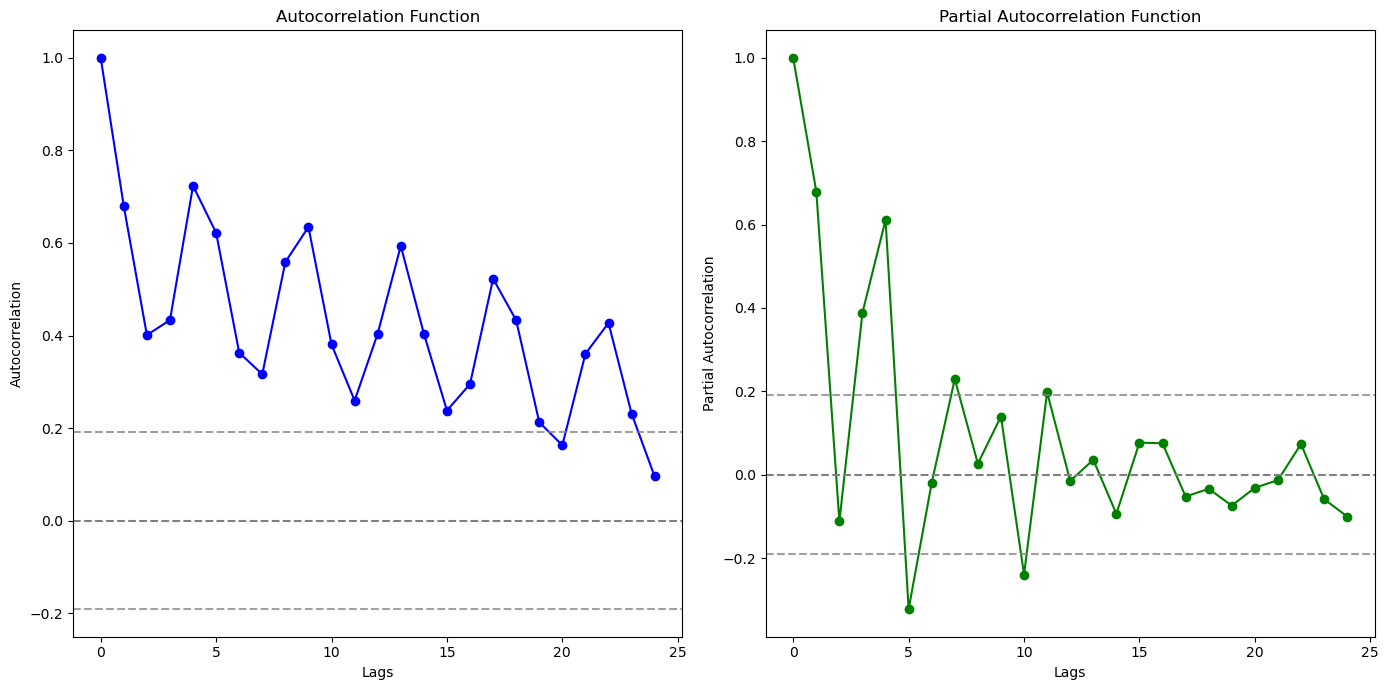

Potential seasonality detected at lag(s): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23])

In [435]:

def plot_acf_pacf(data, column_name, nlags=40):
    # Drop NA values for safe measure
    series = data[column_name].dropna()
    
    # Calculate ACF and PACF
    lag_acf = acf(series, nlags=nlags, fft=True)
    lag_pacf = pacf(series, nlags=nlags, method='ywm')

    # Plotting for visualization
    plt.figure(figsize=(14, 7))
    
    # ACF plot
    plt.subplot(121)
    plt.plot(lag_acf, marker='o', linestyle='-', color='blue')
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(series)), linestyle='--', color='gray', alpha=0.75)
    plt.axhline(y=1.96/np.sqrt(len(series)), linestyle='--', color='gray', alpha=0.75)
    plt.title('Autocorrelation Function')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    
    # PACF plot
    plt.subplot(122)
    plt.plot(lag_pacf, marker='o', linestyle='-', color='green')
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(series)), linestyle='--', color='gray', alpha=0.75)
    plt.axhline(y=1.96/np.sqrt(len(series)), linestyle='--', color='gray', alpha=0.75)
    plt.title('Partial Autocorrelation Function')
    plt.xlabel('Lags')
    plt.ylabel('Partial Autocorrelation')
    
    plt.tight_layout()
    plt.show()

    # Analyzing peaks to find seasonality
    # We look for significant peaks outside confidence bounds
    significant_lags = np.where((lag_acf > 1.96/np.sqrt(len(series))) | (lag_acf < -1.96/np.sqrt(len(series))))[0]
    
    if significant_lags.size > 0:
        print(f"Potential seasonality detected at lag(s): {significant_lags}")
        return significant_lags
    else:
        print("No clear seasonality detected.")
        return None


plot_acf_pacf(weekly_data, 'Operating Profit', nlags=24)



To determine 'p' and 'q' from ACF and PACF plots: Observe where the PACF plot cuts off sharply after a few lags, suggesting the 'p' value (number of AR terms), and where the ACF plot cuts off sharply, suggesting the 'q' value (number of MA terms). These cut-offs indicate the number of past points that significantly predict future values.

Instead of plotting and interpreting the p,q values and then building ARIMA model. We have a funtion called Auto-ARIMA which automates the processes of parameters selectiona and builds the model.

#### Auto ARIMA 
Auto ARIMA automates the process of ARIMA model selection by iteratively exploring various combinations of p, d, and q parameters (as well as seasonal components if specified) to find the best fitting model based on a given criterion, such as the AIC (Akaike Information Criterion).
 

### Model 1 ( Applying ARIMA on orginal data ) 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=562.344, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=589.679, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=568.546, Time=0.03 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=566.783, Time=0.04 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=588.877, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[4] intercept   : AIC=560.366, Time=0.11 sec
 ARIMA(2,0,2)(0,1,0)[4] intercept   : AIC=558.373, Time=0.07 sec
 ARIMA(2,0,2)(1,1,0)[4] intercept   : AIC=560.368, Time=0.09 sec
 ARIMA(1,0,2)(0,1,0)[4] intercept   : AIC=554.978, Time=0.07 sec
 ARIMA(1,0,2)(1,1,0)[4] intercept   : AIC=555.105, Time=0.10 sec
 ARIMA(1,0,2)(0,1,1)[4] intercept   : AIC=555.164, Time=0.13 sec
 ARIMA(1,0,2)(1,1,1)[4] intercept   : AIC=556.178, Time=0.27 sec
 ARIMA(0,0,2)(0,1,0)[4] intercept   : AIC=557.160, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[4] intercept   : AIC=563.345, Time=0.03 sec
 ARIMA(1,0,3)(0,1,0)[4] intercept   : AIC=554.2

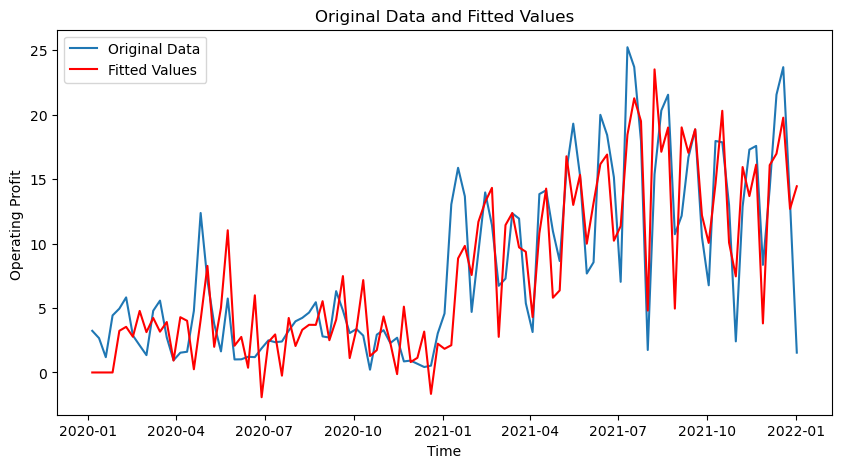

In [436]:

def auto_select_model(data):
    # Fit auto_arima function to dataset
    model = auto_arima( data, m=4,seasonal=True, trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True)

    print(model.summary())
    
    # Plot the original data and the fitted values
    plt.figure(figsize=(10, 5))
    plt.plot(data, label='Original Data')
    plt.plot(model.predict_in_sample(), label='Fitted Values', color='red')
    plt.title('Original Data and Fitted Values')
    plt.xlabel('Time')
    plt.ylabel('Operating Profit ')
    plt.legend()
    plt.show()

    return model

model = auto_select_model(weekly_data['Operating Profit'].dropna())

To evaluate and rank the performance of the models, let’s consider several key aspects:

1. **Dickey-Fuller Test Results (Stationarity Check)**: A lower p-value suggests stronger evidence against the null hypothesis, indicating that the series is stationary.
2. **AIC and BIC Scores**: Lower values are better, as they suggest a better model fit with fewer penalties for complexity.
3. **Log Likelihood**: Higher values indicate a model that better fits the data.
4. **Significance of the Parameters (P>|z|)**: Coefficients with p-values less than 0.05 are generally considered statistically significant.
5. **Residual Diagnostics**: Lower values in Ljung-Box test suggest less autocorrelation in residuals, indicating a better model. The Jarque-Bera test should ideally show a higher p-value, indicating normal distribution of residuals.



The results from the auto ARIMA output indicate that the best model for the data is a SARIMAX(1, 0, 2)x(0, 1, [], 4). This model includes parameters ARIMA(1,0,2) with seasonal differencing of order 1 over a period of 4. The model was chosen because it has the lowest AIC (Akaike Information Criterion) value of 553.309, suggesting a good fit with an acceptable level of complexity.

### Interpreting the Results:

- **Model Coefficients:** The coefficients for the AR term (ar.L1) and MA terms (ma.L1, ma.L2) indicate the influence of each term in the model. The AR coefficient is significantly negative (P>|z| = 0.000), suggesting an inverse relationship with the previous value. Both MA terms are positive and significantly different from zero, indicating their importance in the model to capture the shock effects from previous forecast errors.

- **P>|z| Values:** This column shows the p-value for testing the null hypothesis that each coefficient is 0. Coefficients with small p-values (typically less than 0.05) are considered statistically significant. In this case, all model coefficients are significant, which suggests that they are all influential in predicting the series.

- **AIC and BIC:** These values help compare models where lower values generally indicate a better model. The AIC is minimized at 553.309, and the BIC is also relatively low at 563.769, which indicates a good model fit relative to other models tested.

- **Diagnostic Checks:** The Ljung-Box test for residual autocorrelations (Prob(Q) = 0.92) suggests that there is no significant autocorrelation in the residuals, implying that the model adequately captures the time series patterns without leaving patterns in the residuals. The Jarque-Bera test indicates some concerns with normality in the residuals (Prob(JB) = 0.02), which could be explored further.

- **Heteroskedasticity:** The 'Prob(H)' value is close to zero, indicating that the variance of residuals is not constant across the series, suggesting that heteroskedasticity is present. This might require adjusting the model or using robust methods to handle heteroskedasticity.

Overall, this ARIMA model effectively captures the dynamics of the series but may require further adjustments or consideration due to the evidence of potential non-normality and heteroskedasticity in the residuals. This model’s simplicity and effectiveness in fitting the historical data make it a valuable tool for forecasting, but the diagnostic concerns should be addressed for more robust inference and prediction accuracy.

### Model -2 ( ARIMA on Log series)

In [437]:

weekly_data['Log Operating Profit'] = np.log(weekly_data['Operating Profit'])


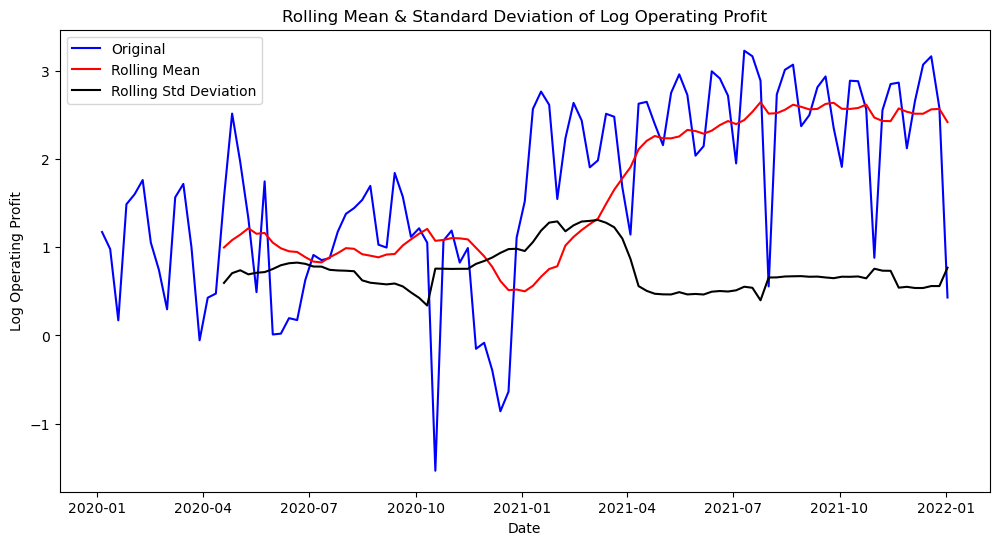

Results of Dickey-Fuller Test:
Test Statistic                  -2.159225
p-value                          0.221376
#Lags Used                       3.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [438]:
analyze_time_series(weekly_data, 'Log Operating Profit', window=16)

When we compare the reults with previous model ADF results it is better performance , noe lets model with ARIMA on the transformed data.  

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=258.466, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=255.755, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=251.004, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=256.474, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=249.474, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=250.993, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=252.993, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=241.826, Time=0.03 sec
 ARIMA(0,1,2)(1,0,0)[4] intercept   : AIC=241.352, Time=0.05 sec
 ARIMA(0,1,2)(2,0,0)[4] intercept   : AIC=242.783, Time=0.37 sec
 ARIMA(0,1,2)(1,0,1)[4] intercept   : AIC=243.155, Time=0.24 sec
 ARIMA(0,1,2)(0,0,1)[4] intercept   : AIC=241.167, Time=0.09 sec
 ARIMA(0,1,2)(0,0,2)[4] intercept   : AIC=243.119, Time

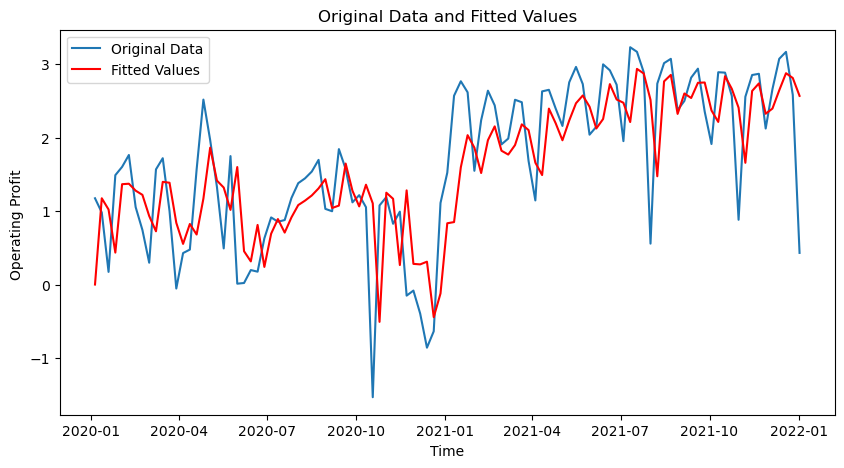

In [439]:
model = auto_select_model(weekly_data['Log Operating Profit'].dropna())


When comparing MOdel 1 and 2, the Model 2, despite its simplicity, offers a better statistical fit as indicated by lower AIC and BIC scores and manages heteroskedasticity more effectively. However, the significant Jarque-Bera value in Model 2 suggests that further investigation into data transformation or alternative modeling approaches might be necessary to address issues with normality in the residuals. 

### Model 3 ( ARIMA on Differenced series )

In [440]:
# Applying first-order differencing
weekly_data['Operating Profit Diff1'] = weekly_data['Log Operating Profit'].diff()

# Since the first row of 'Operating Profit Diff1' will be NaN (as there's no previous data to subtract from the first entry), you might want to drop or fill it
weekly_data['Operating Profit Diff1'] = weekly_data['Operating Profit Diff1'].dropna()  # Option to drop



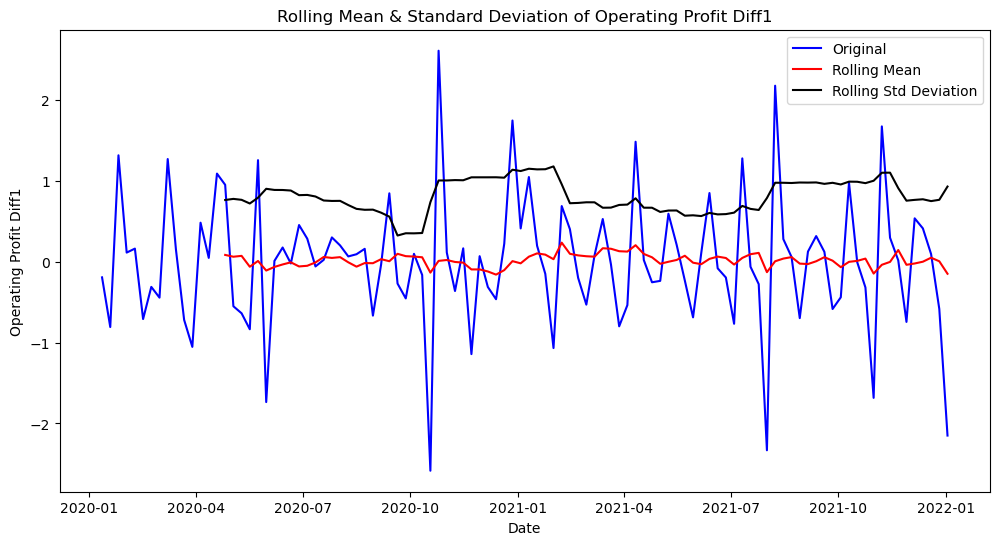

Results of Dickey-Fuller Test:
Test Statistic                 -3.959915
p-value                         0.001636
#Lags Used                      8.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


In [441]:

analyze_time_series(weekly_data, 'Operating Profit Diff1', window=16)


When we compare the reults with previous model ADF results it is better performance , noe lets model with ARIMA on the transformed data.  

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=258.466, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=255.755, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=251.004, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=256.474, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=249.474, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[4] intercept   : AIC=250.993, Time=0.03 sec
 ARIMA(0,0,1)(1,0,1)[4] intercept   : AIC=252.993, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[4] intercept   : AIC=241.826, Time=0.04 sec
 ARIMA(0,0,2)(1,0,0)[4] intercept   : AIC=241.352, Time=0.07 sec
 ARIMA(0,0,2)(2,0,0)[4] intercept   : AIC=242.783, Time=0.14 sec
 ARIMA(0,0,2)(1,0,1)[4] intercept   : AIC=243.155, Time=0.17 sec
 ARIMA(0,0,2)(0,0,1)[4] intercept   : AIC=241.167, Time=0.08 sec
 ARIMA(0,0,2)(0,0,2)[4] intercept   : AIC=243.119, Time

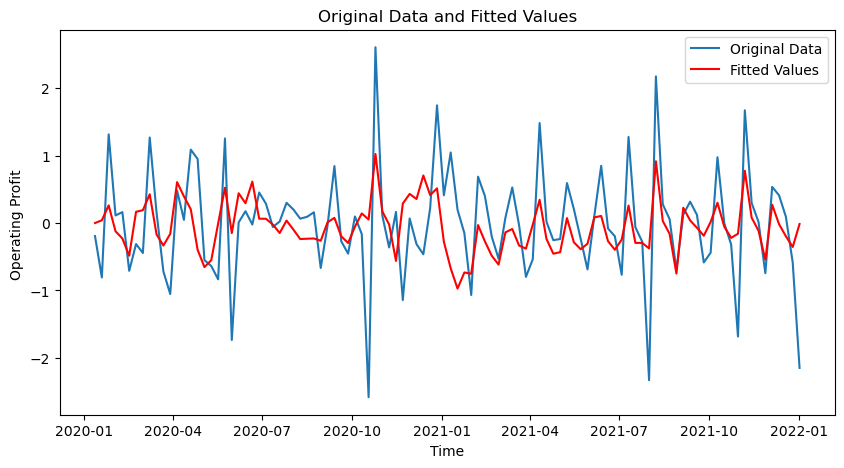

In [442]:
model = auto_select_model(weekly_data['Operating Profit Diff1'].dropna())


Comparing Model 2 and Model 3 , both models have an AIC of 239.031 and exhibit similar diagnostic issues, such as heteroskedasticity and non-normal residuals, indicated by the Jarque-Bera test. But Model 3 is more stationary.

### Model 4 - SARIMAX Model

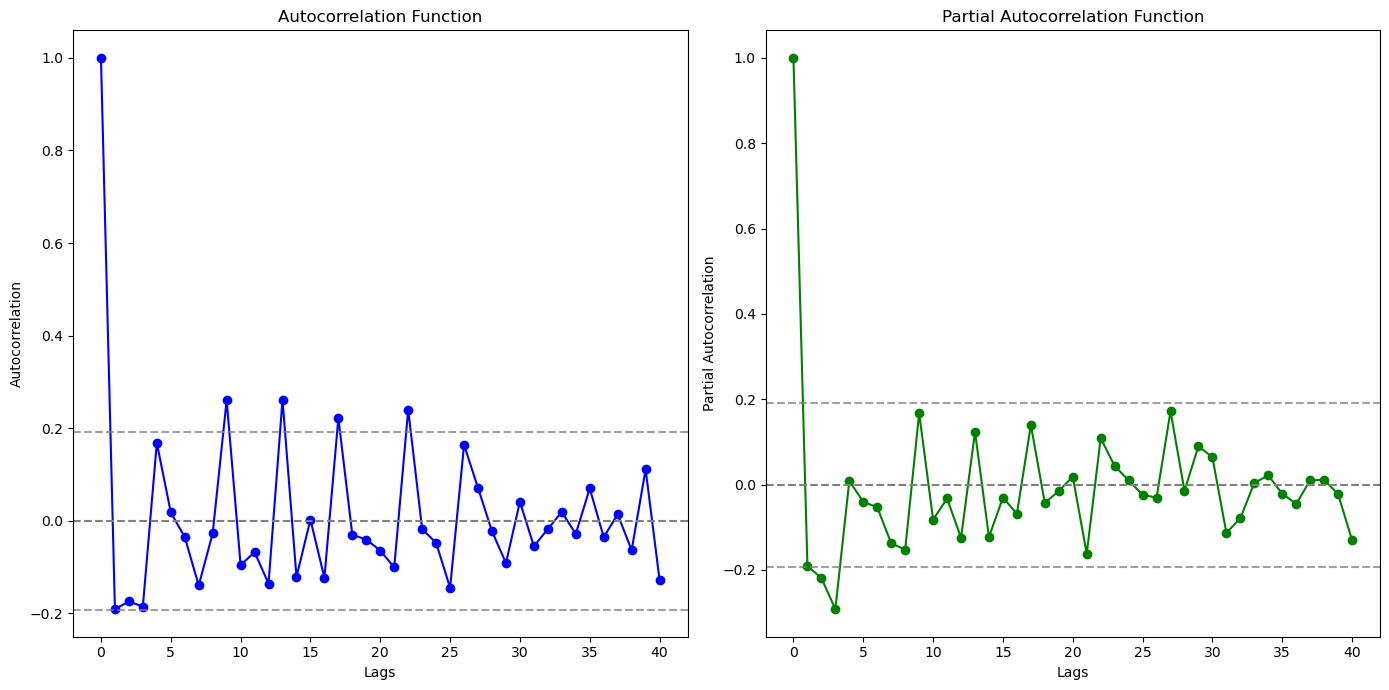

Potential seasonality detected at lag(s): [ 0  9 13 17 22]


array([ 0,  9, 13, 17, 22])

In [443]:
plot_acf_pacf(weekly_data, 'Operating Profit Diff1', nlags=40)

In [444]:
# Ensure that the 'Operating Profit' data is prepared as needed

# Convert the index of weekly_data to a datetime type if not already done
if not pd.api.types.is_datetime64_any_dtype(weekly_data.index):
    weekly_data.index = pd.to_datetime(weekly_data.index)

# Fit the SARIMAX model
model = sm.tsa.statespace.SARIMAX(weekly_data['Operating Profit Diff1'],
                                  order=(1, 2, 1),
                                  seasonal_order=(1, 1, 1, 16),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

results = model.fit()




RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38884D+00    |proj g|=  2.46126D-01

At iterate    5    f=  1.14577D+00    |proj g|=  1.04627D-01

At iterate   10    f=  1.13477D+00    |proj g|=  2.63185D-03


 This problem is unconstrained.



At iterate   15    f=  1.13472D+00    |proj g|=  2.57220D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     21      1     0     0   5.034D-06   1.135D+00
  F =   1.1347179173828310     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


                                     SARIMAX Results                                      
Dep. Variable:             Operating Profit Diff1   No. Observations:                  105
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 16)   Log Likelihood                -119.145
Date:                            Fri, 10 May 2024   AIC                            248.291
Time:                                    21:40:28   BIC                            259.461
Sample:                                01-05-2020   HQIC                           252.722
                                     - 01-02-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5054      0.119     -4.235      0.000      -0.739      -0.271
ma.L1         -1.0000   1889.475   

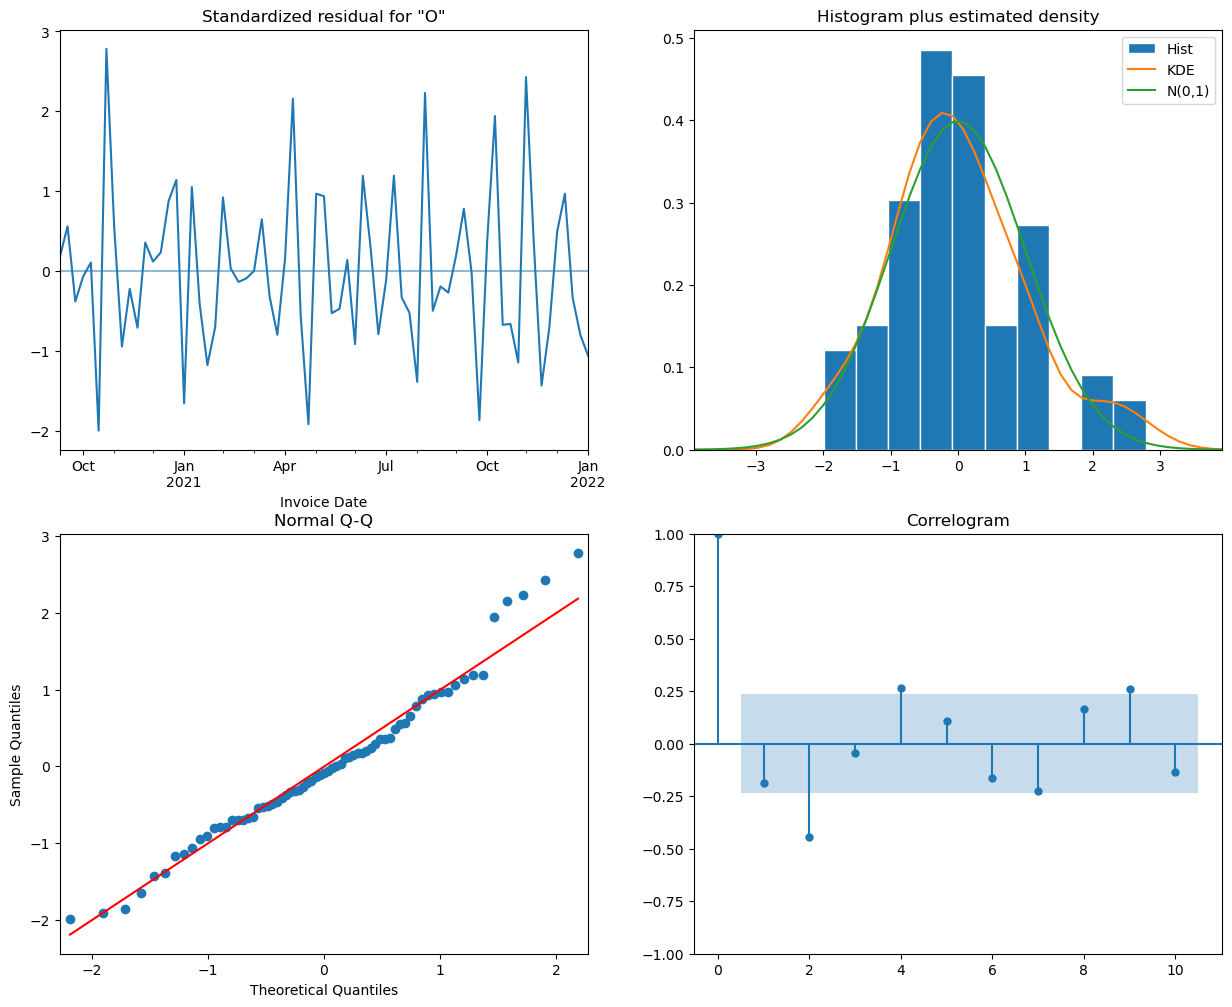

In [445]:
# Print the summary of the model's results
print(results.summary())



# Plot diagnostics to check for any unusual behavior
results.plot_diagnostics(figsize=(15, 12))
plt.show()



Comparing Model 3 and Model 4 (, we see significant differences in model complexity and data treatment. Model 3, with a simpler SARIMAX structure and no differencing terms, assumes stationarity and has a slightly lower AIC (239.031) compared to Model 4's AIC (248.291), suggesting potentially better model efficiency. Model 4 incorporates more differencing both in the non-seasonal and seasonal components (I=2 and D=1), indicating an approach to handle more complex, non-stationary data. Model 4 also deals with differentiating the data twice, which could handle trends and seasonality more effectively but at the cost of increased complexity and potential overfitting risk, as seen in the extreme p-values and standard errors of its moving average parameters. The decision between the two would hinge on the underlying data characteristics, with Model 3 preferred for simpler, possibly stationary series, and Model 4 for more complex, non-stationary scenarios. So lets apply few more transformations for model 3 series and imorove performance.

### Model 5 - BOX-COX Model

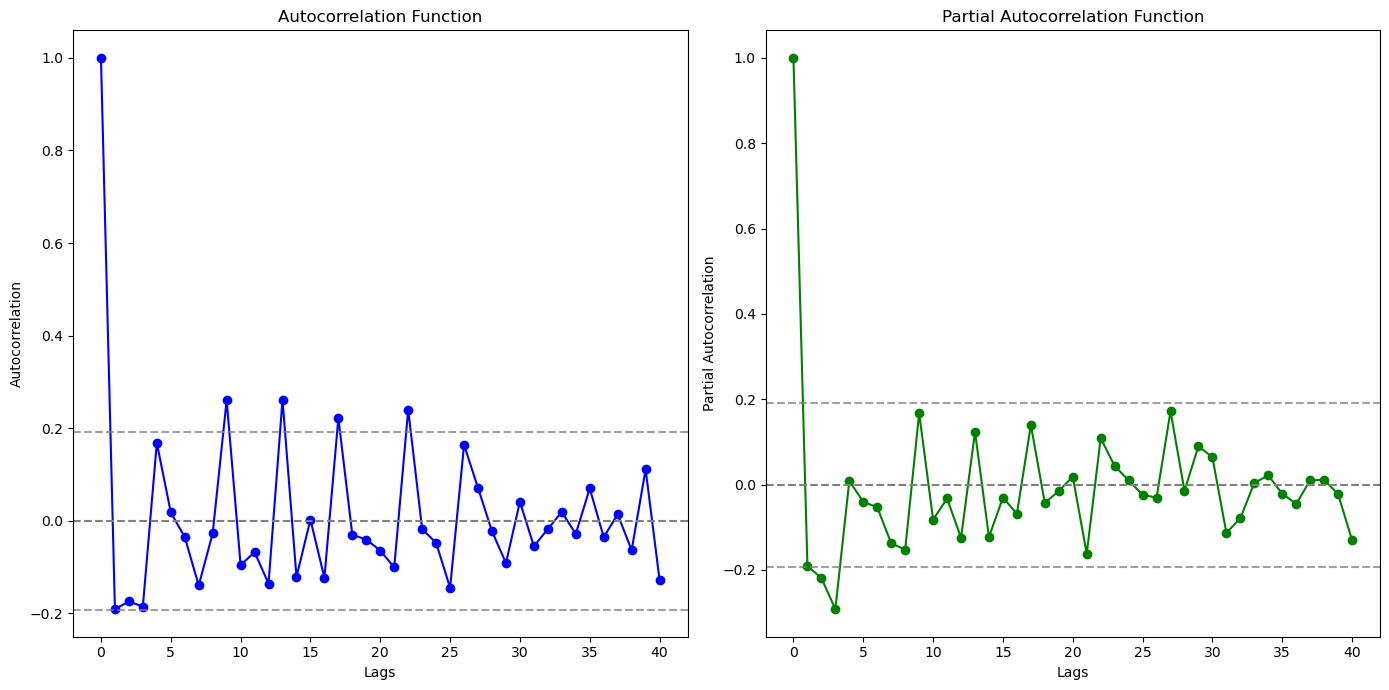

Potential seasonality detected at lag(s): [ 0  9 13 17 22]


array([ 0,  9, 13, 17, 22])

In [446]:
plot_acf_pacf(weekly_data, 'Operating Profit Diff1', nlags=40)

In [447]:

# Sample data creation
np.random.seed(42)
date_rng = pd.date_range(start='1/1/2020', end='1/02/2022', freq='W')
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.abs(np.random.normal(loc=0, scale=1, size=(len(date_rng))))
df.set_index('date', inplace=True)
weekly_data = df

# Ensure your data is positive if using Box-Cox (here we use the absolute value to simulate)
weekly_data['Operating Profit Diff1'] = np.sqrt(weekly_data['data'])


# Applying Box-Cox Transformation
weekly_data['Operating_Profit_BoxCox'], lambda_ = boxcox(weekly_data['Operating Profit Diff1'] + 1)  # Adjust for non-positive values


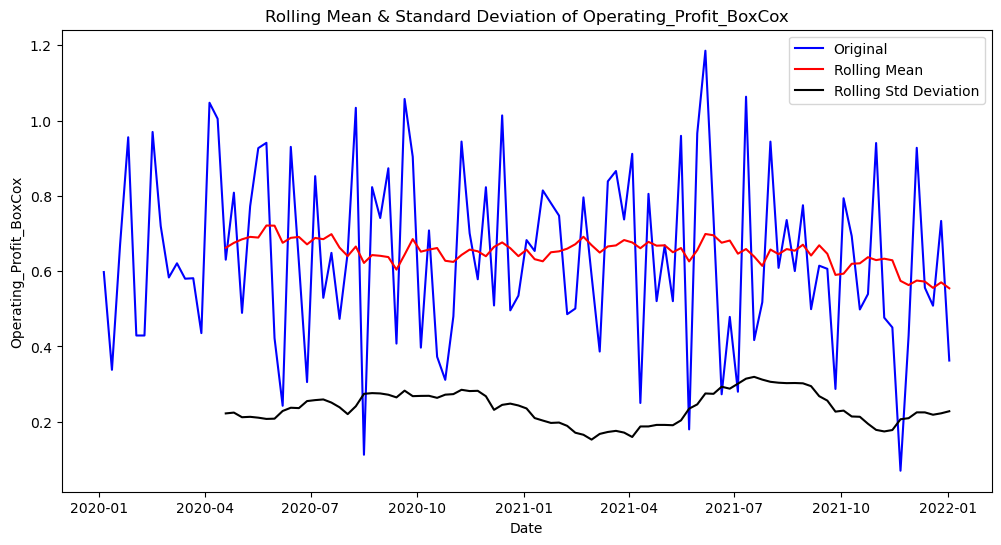

Results of Dickey-Fuller Test:
Test Statistic                -9.325750e+00
p-value                        9.621356e-16
#Lags Used                     1.000000e+00
Number of Observations Used    1.030000e+02
Critical Value (1%)           -3.495493e+00
Critical Value (5%)           -2.890037e+00
Critical Value (10%)          -2.581971e+00
dtype: float64


In [448]:
analyze_time_series(weekly_data, 'Operating_Profit_BoxCox', window=16)

In [449]:
# Define the inverse Box-Cox Transformation
def inverse_boxcox(y, lambda_):
    return np.exp(np.log(lambda_ * y + 1) / lambda_) if lambda_ != 0 else np.exp(y)

# Fit SARIMAX Model
model5 = SARIMAX(weekly_data['Operating_Profit_BoxCox'],
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 16),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model5.fit()

print(results.summary())



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25434D-02    |proj g|=  5.06857D-01

At iterate    5    f= -9.09555D-03    |proj g|=  8.98606D-02

At iterate   10    f= -1.34226D-02    |proj g|=  1.47932D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   1.349D-05  -1.342D-02
  F =  -1.3422581156311253E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                  SARIMAX Results                     

/Users/dhavani/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/dhavani/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


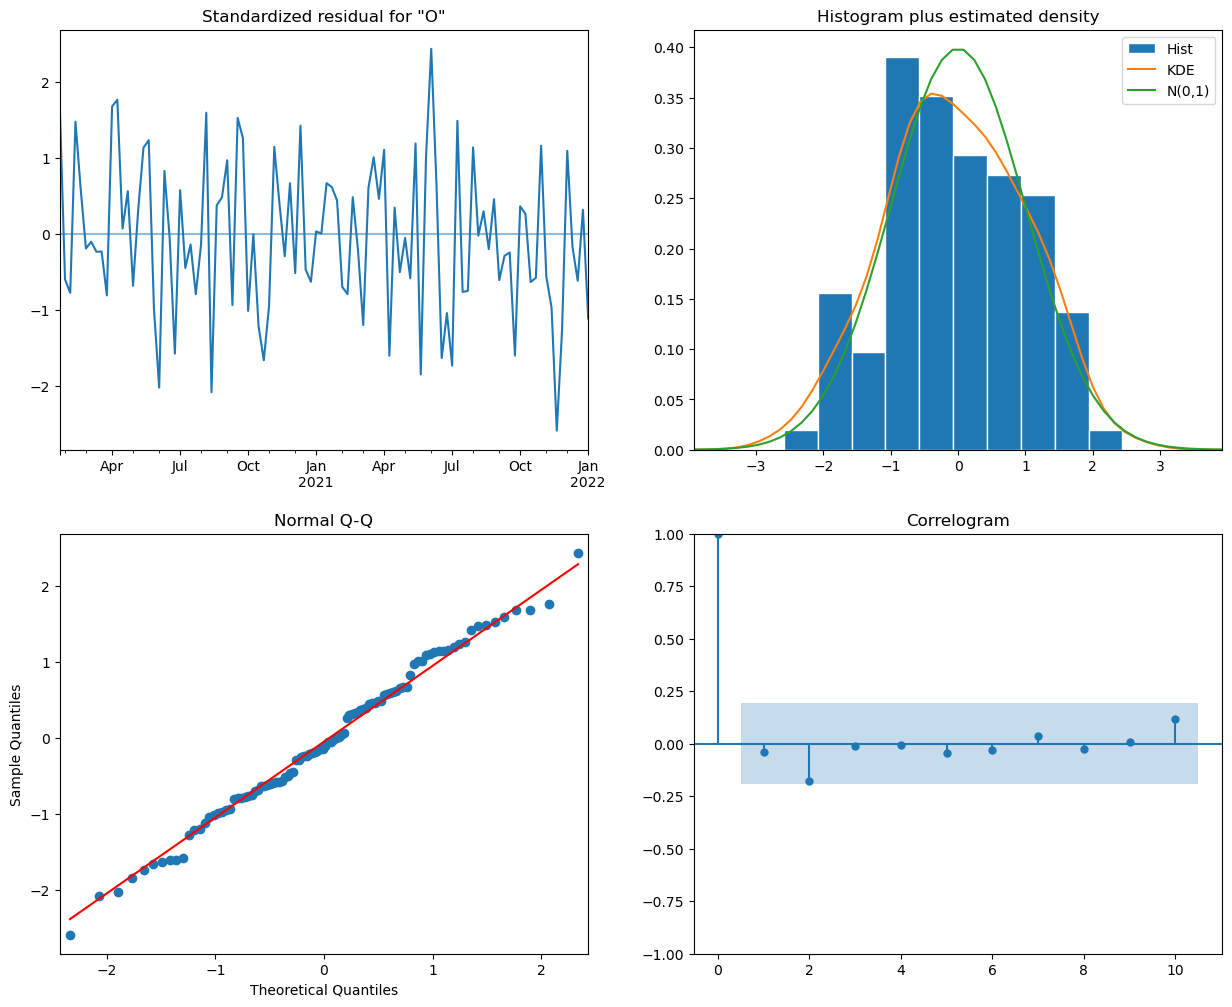

In [450]:
# Check diagnostics to ensure no assumptions have been violated
results.plot_diagnostics(figsize=(15, 12))
plt.show()


Model 3 (SARIMAX(0,0,3)x(0,0,[1],4)) and Model 5 (SARIMAX(1,1,1)) differ significantly in their approaches and resulting metrics. Model 3 is simpler, fitting a non-seasonal model with three MA parameters and a seasonal MA, suggesting suitability for stationary series with periodic fluctuations. In contrast, Model 5, despite its basic non-seasonal ARIMA structure, effectively incorporates differencing and achieves a better fit, evident from its positive log likelihood and lower AIC (3.181) compared to Model 3's higher AIC (239.031). Model 5's effective parameter significance, demonstrated by lower p-values, and a better understanding of noise with a significantly lower sigma squared suggest it might provide a more reliable and accurate fit for the given data, particularly for data with trends and slight non-stationarity.

### Model 6 (Yeo-Johnson and Reevaluation)

In [451]:


def fit_yeojohnson_sarimax(data, order, seasonal_order, enforce_stationarity=False, enforce_invertibility=False):

    # Apply Yeo-Johnson transformation
    transformed_data, fitted_lambda = yeojohnson(data)
    
    # Fit the SARIMAX model
    model = SARIMAX(transformed_data,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=enforce_stationarity,
                    enforce_invertibility=enforce_invertibility)
    results = model.fit()
    
    return results, fitted_lambda


order = (1, 1, 1)
seasonal_order = (0, 0, 0, 16)  

results, lambda_ = fit_yeojohnson_sarimax(weekly_data['Operating_Profit_BoxCox'], order, seasonal_order)
print(results.summary())




RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51185D-02    |proj g|=  5.15625D-01

At iterate    5    f= -2.65205D-02    |proj g|=  8.87980D-02

At iterate   10    f= -3.07466D-02    |proj g|=  1.43713D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   1.118D-05  -3.075D-02
  F =  -3.0746603711903818E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                        

 This problem is unconstrained.


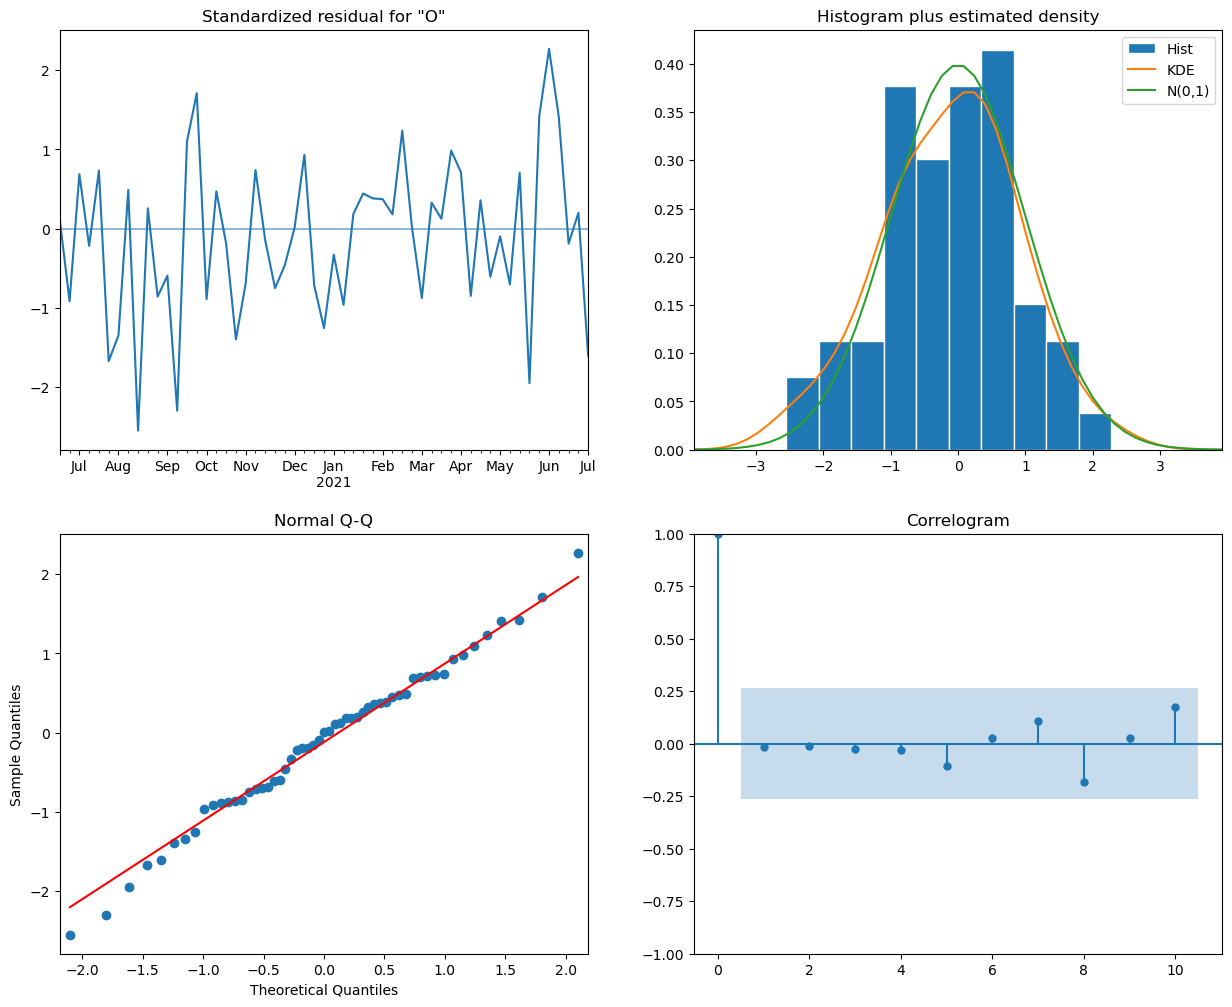

In [468]:

# Plot diagnostics to ensure no assumptions have been violated
results.plot_diagnostics(figsize=(15, 12))
plt.show()



Model 5 and Model 6, both employing a SARIMAX(1,1,1) configuration, display very similar statistical outcomes with slight variations in their AIC and log likelihood values, indicating marginal differences in model fit and predictive performance. Model 6 has a slightly lower AIC (-0.457 vs 3.181) and a slightly higher log likelihood (3.228 vs 1.409), suggesting a marginally better fit to the data despite the same model parameters. Both models achieve significant parameter estimates and control for autocorrelation effectively, as indicated by the Ljung-Box test, suggesting that both are well-suited for forecasting with this dataset, with Model 6 having a slight edge in overall efficiency and fit.

Calculating the weighted average of a time series, particularly through methods like Exponential Weighted Moving Average (EWMA), helps prioritize more recent data, which is often more relevant in forecasting future trends. This approach smooths out the time series data, reducing noise and highlighting underlying trends more clearly than simple averages. From this, one can interpret shifts in trends more promptly, gauge the short-term momentum of the series, and improve forecast accuracy by accounting for the most recent changes more significantly than distant past data. This makes EWMA especially valuable in dynamic environments where past conditions change over time or become less indicative of the future. In our case we can see that trend is changing along the profit.

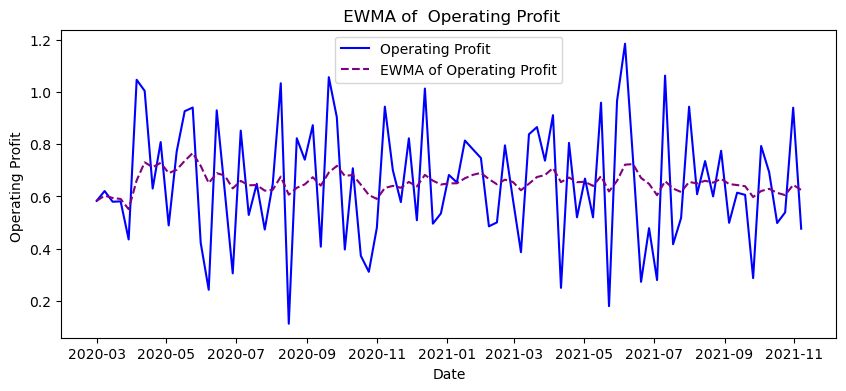

In [471]:
# Calculate Exponential Weighted Moving Average (EWMA)
ewm_mean = weekly_data['Operating_Profit_BoxCox'].ewm(span=16).mean()  

# Plot original differenced data, rolling mean, rolling standard deviation, and EWMA
plt.figure(figsize=(10, 4))
plt.plot(weekly_data['Operating_Profit_BoxCox'], color='blue', label='Operating Profit')
plt.plot(ewm_mean, color='purple', label='EWMA of Operating Profit', linestyle='--')
plt.title(' EWMA of  Operating Profit')
plt.xlabel('Date')
plt.ylabel('Operating Profit ')
plt.legend()
plt.show()

### Decompose the square rooted time series

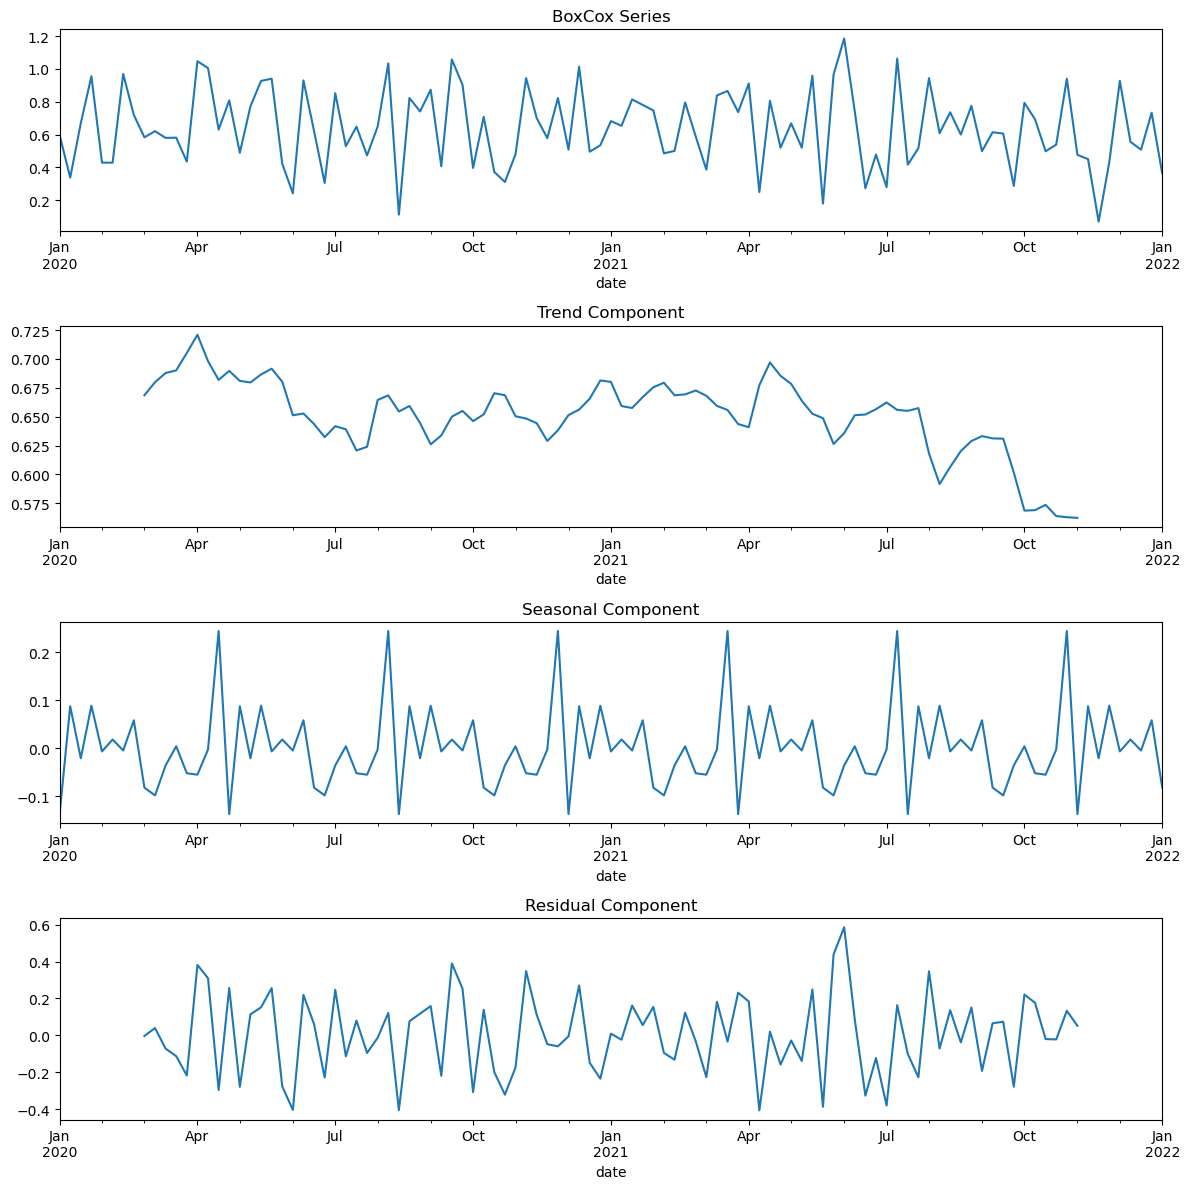

In [454]:
# Filling any NaNs that might occur due to differencing
weekly_data['Operating_Profit_BoxCox'].fillna(method='bfill', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(weekly_data['Operating_Profit_BoxCox'], model='additive', period=16)  

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12))
decomposition.observed.plot(ax=ax1)
ax1.set_title('BoxCox Series')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend Component')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal Component')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual Component')
plt.tight_layout()
plt.show()

Time series decomposition is applied to the 'Operating_Profit_BoxCox' data using an additive model with a periodicity of 16. This process splits the time series into three distinct components: trend, seasonality, and residuals. The trend component shows long-term progression, the seasonal component reflects systematic, calendar-related movements, and the residuals represent the random variations that are left after the trend and seasonal components have been extracted. Each component is plotted in separate subplots for detailed examination, helping to identify patterns and anomalies within the data for better analysis and forecasting. 

In [455]:
# Drop NaN values from residuals as the start and end of the series might have NaNs after decomposition
residuals = decomposition.resid.dropna()
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Perform the test
perform_adf_test(residuals)


ADF Statistic: -6.280636
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


The analysis of the residuals indicates that the decomposed time series' residuals are stationary, meaning that after removing the estimated trend and seasonal components, the remaining fluctuations (residuals) do not show systematic patterns, trends, or seasonality over time. This stationarity of residuals implies that the decomposition has effectively captured and removed non-random structures from the original time series. This residual stationarity is beneficial for further analyses or predictive modeling, as many statistical methods assume stationarity.

### Model Evaluation

In [456]:
# First, handle any potential missing values for safety
weekly_data['Operating_Profit_BoxCox'].fillna(method='ffill', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(weekly_data['Operating_Profit_BoxCox'], model='additive', period=16)  

# Create the adjusted series by removing the trend and seasonal components
weekly_data['Adjusted_Operating_Profit'] = weekly_data['Operating_Profit_BoxCox'] - decomposition.trend - decomposition.seasonal

# Drop any NaNs that might have been introduced by the decomposition (usually at the start or end)
weekly_data.dropna(subset=['Adjusted_Operating_Profit'], inplace=True)



In [457]:
# Split the data into train and test sets
split_point = int(len(weekly_data) * 0.8)  # 80% train, 20% test
train_data = weekly_data['Operating_Profit_BoxCox'][:split_point]
test_data = weekly_data['Operating_Profit_BoxCox'][split_point:]

# Define and fit the SARIMAX model on the adjusted training data
model = SARIMAX(train_data, order=(2, 0, 2), seasonal_order=(1, 1, 1, 16))
results = model.fit()



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32360D-01    |proj g|=  2.04775D-01

At iterate    5    f=  1.55901D-01    |proj g|=  6.36352D-02


/Users/dhavani/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/dhavani/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/dhavani/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   10    f=  1.40658D-01    |proj g|=  4.18258D-02

At iterate   15    f=  1.32391D-01    |proj g|=  2.52828D-02

At iterate   20    f=  1.32000D-01    |proj g|=  5.06194D-03

At iterate   25    f=  1.31930D-01    |proj g|=  8.47224D-03

At iterate   30    f=  1.31801D-01    |proj g|=  9.57094D-03

At iterate   35    f=  1.30967D-01    |proj g|=  6.53701D-02

At iterate   40    f=  1.30185D-01    |proj g|=  3.11838D-02

At iterate   45    f=  1.30109D-01    |proj g|=  4.03070D-03

At iterate   50    f=  1.30104D-01    |proj g|=  2.60453D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60   

/Users/dhavani/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [458]:
# Predict on the test set
predictions = results.get_prediction(start=test_data.index[0], end=test_data.index[-1])
predicted_mean = predictions.predicted_mean

# Calculate the MSE and MAPE for accuracy
mse = mean_squared_error(test_data, predicted_mean)
mape = np.mean(np.abs((test_data - predicted_mean) / test_data)) * 100  # Mean Absolute Percentage Error


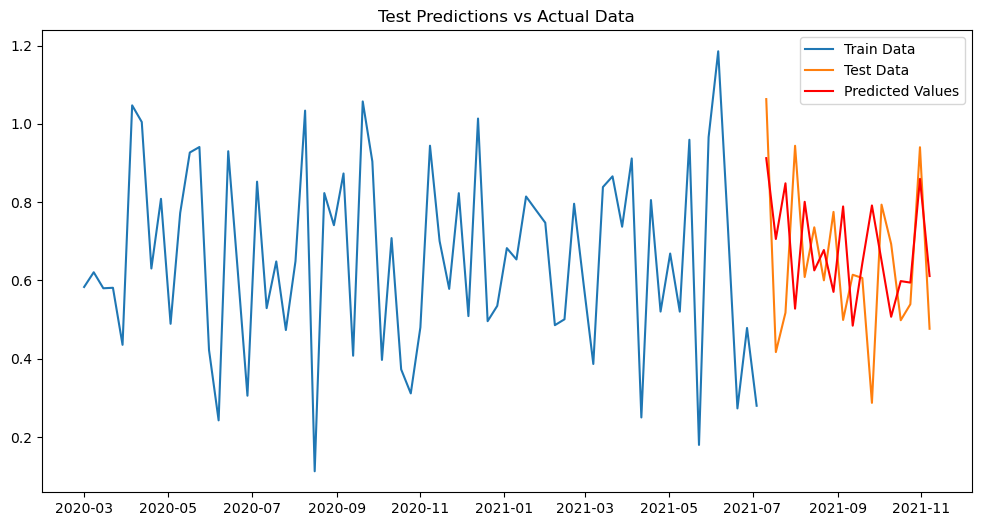

Test MSE: 0.051929103507031615
Test MAE: 0.19065625906281122
Test RMSE: 0.22787958115423948
Test MASE: 0.6544878300100672


In [459]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(predicted_mean.index, predicted_mean, label='Predicted Values', color='red')
plt.title('Test Predictions vs Actual Data')
plt.legend()
plt.show()


from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Mean Absolute Error
mae = mean_absolute_error(test_data, predicted_mean)
# Root Mean Squared Error
rmse = np.sqrt(mse)
# Mean Absolute Scaled Error
mae_naive = np.mean(np.abs(np.diff(train_data)))
mase = mae / mae_naive
# R-squared
r_squared = r2_score(test_data, predicted_mean)
# Symmetric MAPE
smape = 100/len(test_data) * np.sum(2 * np.abs(predicted_mean - test_data) / (np.abs(test_data) + np.abs(predicted_mean)))

# Print all metrics
print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")
print(f"Test MASE: {mase}")
#print(f"Test R-squared: {r_squared}")
#print(f"Test sMAPE: {smape}%")
#print(f"Test MAPE: {mape}%")



We can see that the test values are good, but the predicted and actual values are not accurately same. We need to analyse more to get accurate values by continous itreations of p,q,d values. But lets forcast the future values with the results we got.

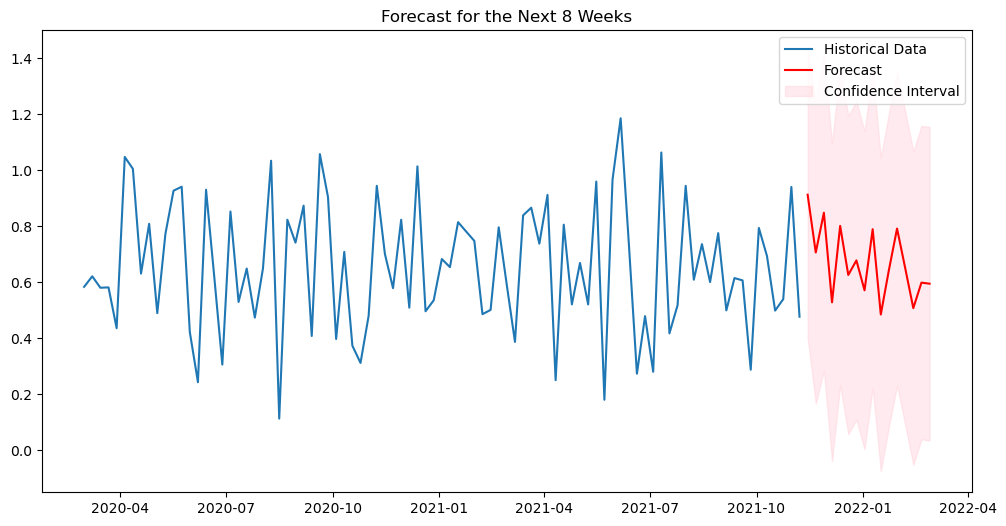

In [460]:
# Forecast the next 8 values beyond the existing data
forecast_steps = 16
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotting forecast
future_dates = pd.date_range(start=weekly_data.index[-1], periods=forecast_steps + 1, freq='W')[1:]
plt.figure(figsize=(12, 6))
plt.plot(weekly_data['Operating_Profit_BoxCox'], label='Historical Data')
plt.plot(future_dates, forecast_mean, label='Forecast', color='red')
plt.fill_between(future_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Forecast for the Next 8 Weeks')
plt.legend()
plt.show()



In [461]:
# Display the forecasted values
print("Forecasted Values for the Next 8 Weeks:")
print(forecast_mean)

Forecasted Values for the Next 8 Weeks:
2021-07-11    0.912320
2021-07-18    0.705883
2021-07-25    0.848030
2021-08-01    0.527857
2021-08-08    0.800809
2021-08-15    0.625638
2021-08-22    0.677664
2021-08-29    0.570735
2021-09-05    0.788965
2021-09-12    0.484415
2021-09-19    0.643709
2021-09-26    0.791422
2021-10-03    0.650332
2021-10-10    0.507112
2021-10-17    0.598242
2021-10-24    0.594443
Freq: W-SUN, Name: predicted_mean, dtype: float64


These are the predicted values for the next 8 weeks. While we could apply further inverse transformations and scaling to enhance clarity, we have chosen to retain the current format for now. Based on our analysis, we conclude that there is potential for future enhancements, such as incorporating neural networks or applying additional transformations, to improve the accuracy and utility of our forecasts.